<a href="https://colab.research.google.com/github/nadireus/Customer-Segmentation/blob/main/Cluestering_Analysis_Customers_Segmentation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". 

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

 After getting to know the data set quickly, we perform Exploratory Data Analysis. There are observation about  the distribution of customers according to different variables, also  relationships and correlations between variables. Then  spesifying the different variables to use for cluster analysis.

Finally, we clustered customers using the ***K-Means Clustering***, ***Hierarchial Clustiring***  methods, and label the clusters.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---
---

##Content



#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

1.Segmentation using Age and Spending Score

  
    
    
2.Segmentation using Annual Income and Spending Score

   
    
    
3.Segmentation using Age , Annual Income and Spending Score

  

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [ ]:
!pip install pyclustertend

In [ ]:
pip install -U yellowbrick

In [185]:
# !pip install pyforest
# !pip install ipython
# !pip install pyclustertend

# 1-Import Libraies
import numpy as np
import pandas as pd 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.compose import make_column_transformer
from sklearn.cluster import KMeans
from pyclustertend import hopkins
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# 2-Scaling
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


# 3-Importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# 4-Ignore Warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.warn("this will not show")

# 5-Figure&Display options
plt.rcParams["figure.figsize"] = (10, 6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
sns.set_style("whitegrid")

!pip install termcolor
from termcolor import colored
import missingno as msno 

# !pip3 install termcolor
# import colorama
# from colorama import Fore, Style  # makes strings colored
# from termcolor import colored

In [ ]:
# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff



#### Load Dataset

In [166]:
df=pd.read_csv('/content/drive/MyDrive/Programmer income/Mall_Customers.csv')

In [98]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#Feature Informations

 Exploratory Data Analysis (EDA)

In [167]:
df.rename(columns={'Annual Income (k$)': 'Annual_Income'}, inplace=True)

In [168]:
df.rename(columns={'Spending Score (1-100)': 'Spending_Score'}, inplace=True)

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
print("There is", df.shape[0], "observation and", df.shape[1], "columns in the dataset")

There is 200 observation and 5 columns in the dataset


In [ ]:
#select numeric columns
df_numeric = df.select_dtypes(include=[np.number]) #select numeric columns
numeric_cols = df_numeric.columns.values 
print(numeric_cols)

['CustomerID' 'Age' 'Annual_Income' 'Spending_Score']


In [ ]:
df.corr()

,CustomerID,Age,Annual_Income,Spending_Score
CustomerID,1.000,-0.027,0.978,0.014
Age,-0.027,1.000,-0.012,-0.327
Annual_Income,0.978,-0.012,1.000,0.010
Spending_Score,0.014,-0.327,0.010,1.000


---
---

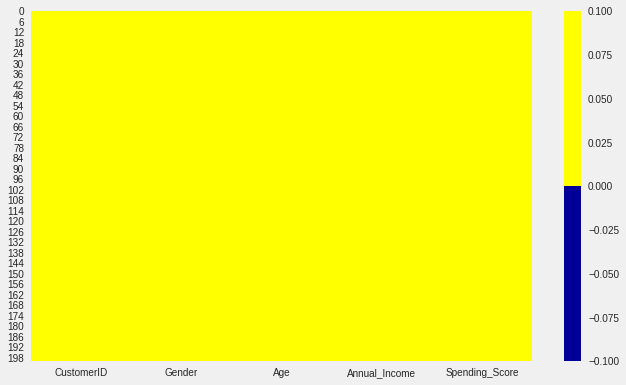

In [ ]:
cols = df.columns[:5] 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is  missing. blue is not  missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [ ]:
#select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number]) 
non_numeric_cols = df_non_numeric.columns.values 
print(non_numeric_cols)

['Gender']


In [ ]:
def missing(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

def missing_values(df):
    return missing(df)[missing(df)['Missing_Number']>0]
missing_values(df)

,Missing_Number,Missing_Percent


In [ ]:
df.sample(15)

,CustomerID,Gender,Age,Annual_Income,Spending_Score
140,141,Female,57,75,5
46,47,Female,50,40,55
155,156,Female,27,78,89
6,7,Female,35,18,6
180,181,Female,37,97,32
122,123,Female,40,69,58
80,81,Male,57,54,51
165,166,Female,36,85,75
79,80,Female,49,54,42
32,33,Male,53,33,4


In [ ]:
dat = ff.create_table(df.head())

py.iplot(dat)

In [ ]:
# describing the data

desc = ff.create_table(df.describe())
py.iplot(desc);

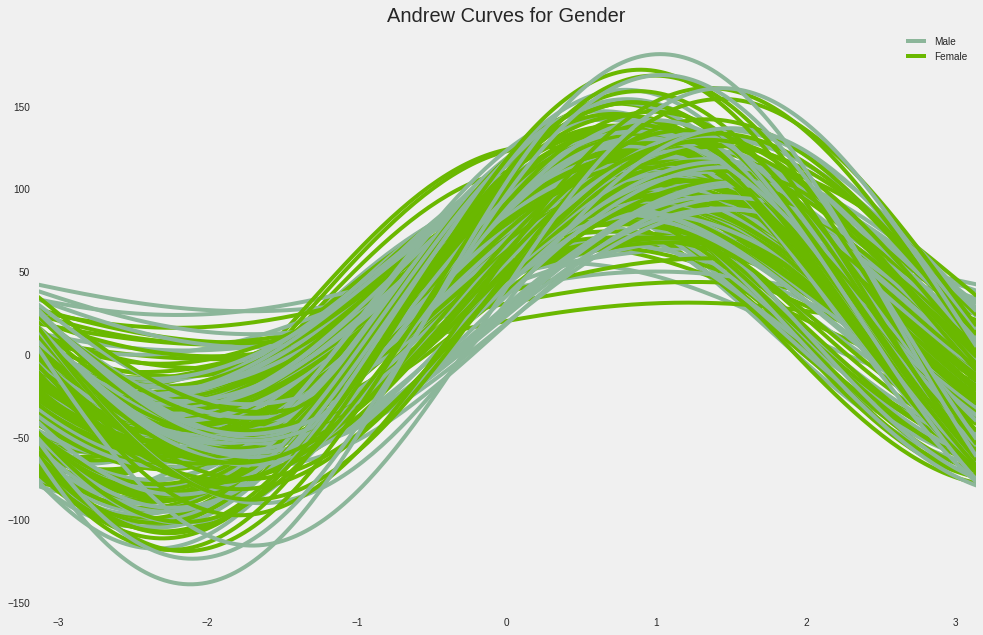

In [ ]:
plt.rcParams['figure.figsize'] = (15, 10)


pd.plotting.andrews_curves(df.drop("CustomerID", axis=1), "Gender")
plt.title('Andrew Curves for Gender', fontsize = 20)
plt.show()

In data visualization, an Andrews plot or Andrews curve is a way to visualize structure in high-dimensional data.In the plot above, the each color used represents a class but we can easily note that the lines that represent samples from the same class .

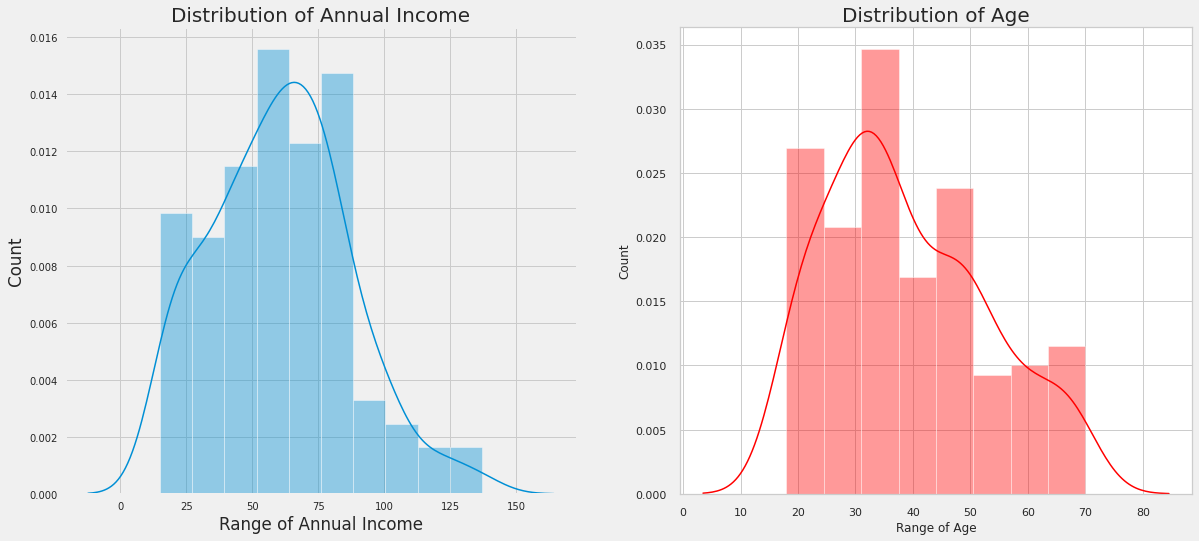

In [ ]:
plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(df['Annual_Income'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(df['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

 In the plots above we can see the distribution pattern of Annual Income and Age.

We can infer that there are few people who earn more than 100 US Dollars. Most of the people have an earning of around 50-75 US Dollars. Also, we can say that the least Income is around 20 US Dollars.

Taking inferences about the Customers.

The most regular customers  has age around 30-35 years of age.However the the senior customer age group is the least frequent visitor.There are few young visitors as compared to the Middle aged people.

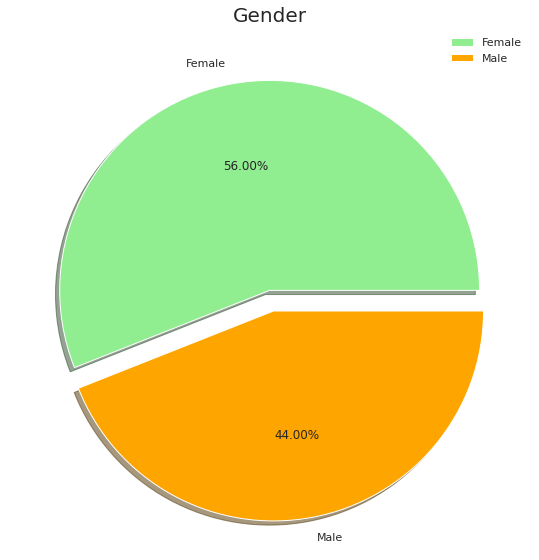

In [ ]:
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

By looking at the above pie chart which explains about the distribution of Gender in the Mall

Interestingly, The Females are in the lead with a share of 56% whereas the Males have a share of 44%, that's a huge gap.

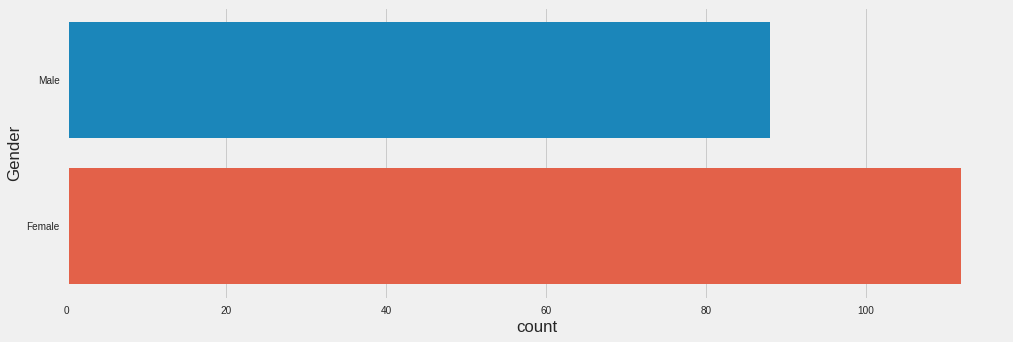

In [ ]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

---
---

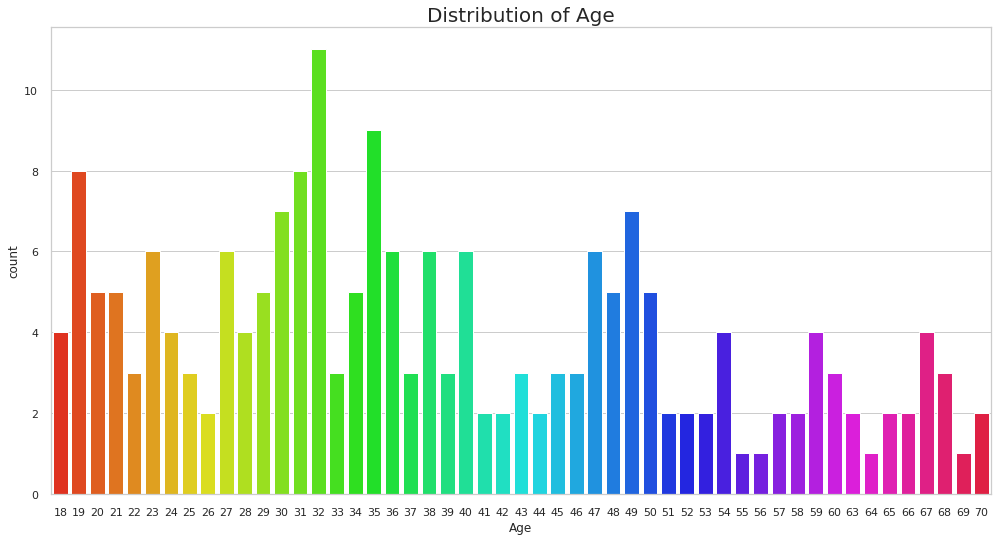

In [ ]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(df['Age'], palette = 'hsv')
plt.title('Distribution of Age', fontsize = 20)
plt.show()



The  diagram above showing the relationship of quantities of customers according to their ages, It can be seen that, the people at the ages from 27 to 39 are  most frequently visitors but there is no clear pattern, we can only find some group wise patterns such as the the older age groups are least frequent as compared middle Aged visitors.People at Age 32 are the most Frequent Visitors in the.We may use age as clustering the Customers.

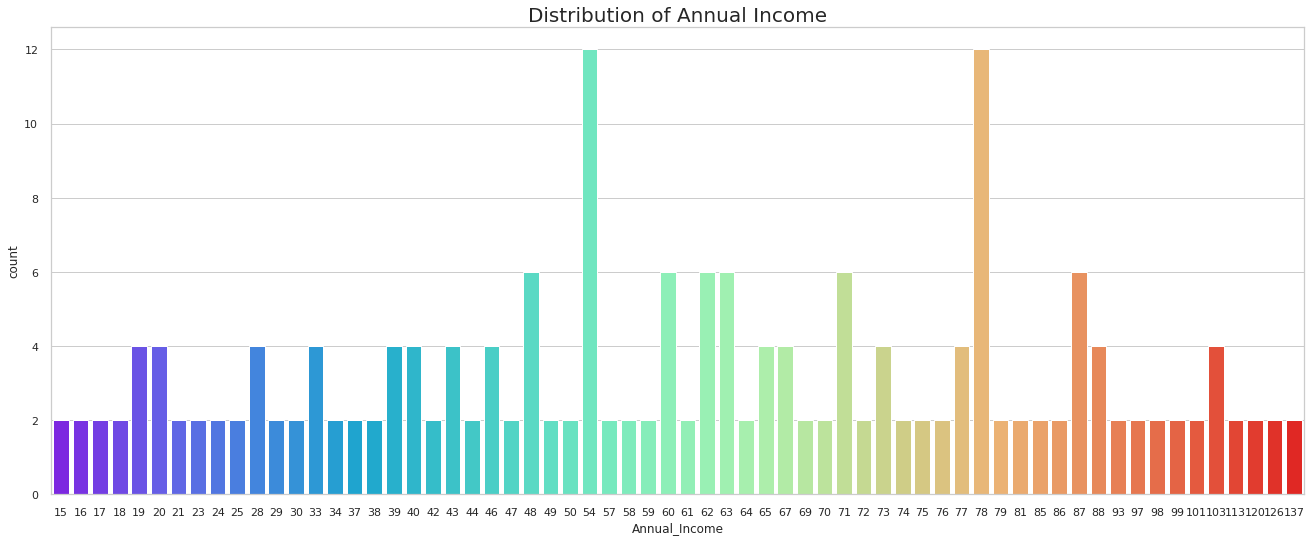

In [ ]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(df['Annual_Income'], palette = 'rainbow')
plt.title('Distribution of Annual Income', fontsize = 20)
plt.show()

In the Chartgraph above shows  the distribution of each  Income level of Visitors in the Mall.The visitors, whose income is  54k and 78K,visit the Mall most frequantly than others.It is really strange, the people, who has higher income than others, do not often visit the Mall.

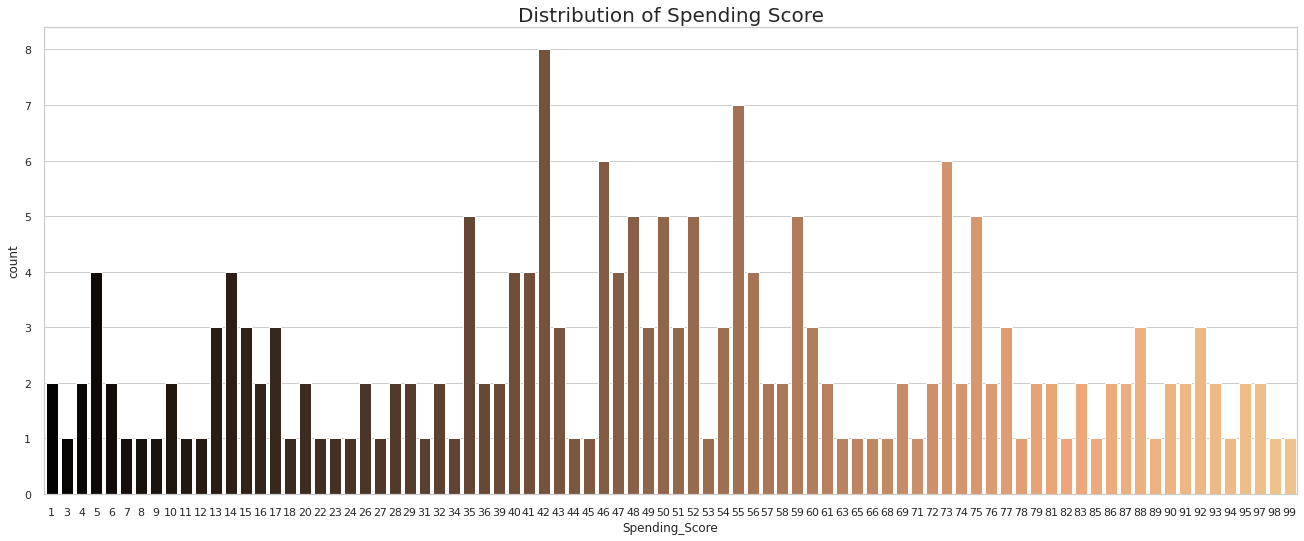

In [ ]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(df['Spending_Score'], palette = 'copper')
plt.title('Distribution of Spending Score', fontsize = 20)
plt.show()

This Chart gives some intuition and idea about the Spending Score of the Customers.

 we may conclude that most of the Customers have their Spending Score in the range of 35-60. 

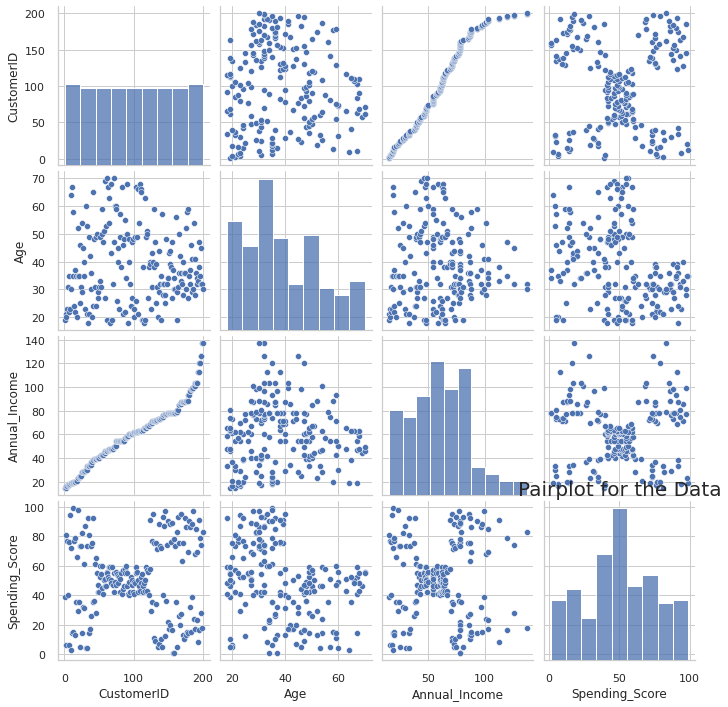

In [ ]:
sns.pairplot(df)
plt.title('Pairplot for the Data', fontsize = 20)
plt.show()

According to Pairplot above we can conclude there is a realtionship between Annual Income and Customer ID, There is a high correlation betweeen them.they may give an ID according to their Annual Income.Therefore this relationship does not help us to cluster Customers.We need to drop Customer ID column.

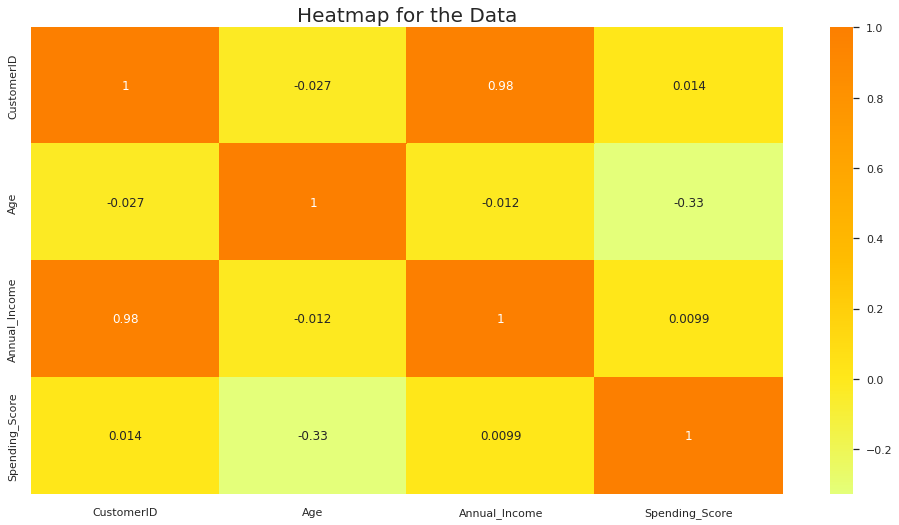

In [ ]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(df.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

The Above Graph for Showing the correlation between the different attributes of the Mall Customer Segementation Dataset, This Heat map reflects the most correlated features with Orange Color and least correlated features with yellow color.

As we above mentioned, there is a strong correcaltion between Annual Income and Customer Id.We can clearly see that other attributes do not have good correlation among them.

In [169]:
df.drop(columns='CustomerID', axis=1, inplace=True)

In [ ]:
df.columns

Index(['Gender', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')

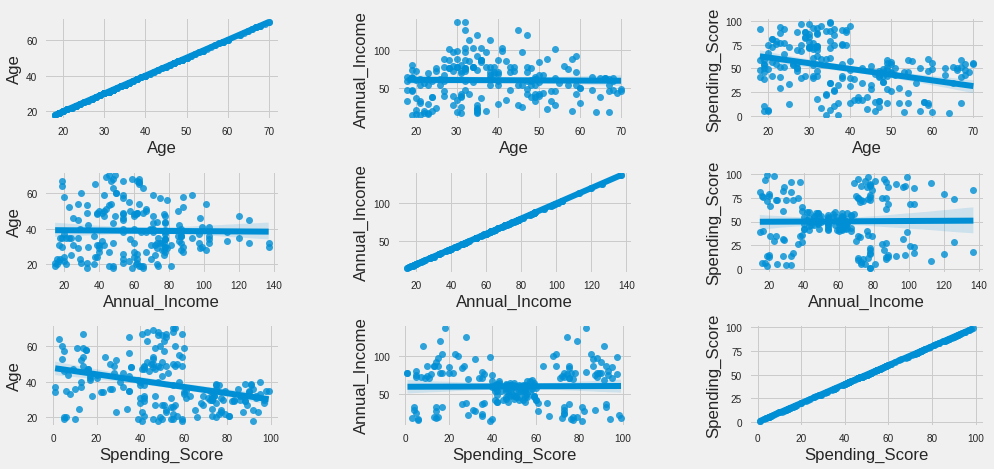

In [ ]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual_Income' , 'Spending_Score']:
    for y in ['Age' , 'Annual_Income' , 'Spending_Score']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

Acoording to  Pairplot above there is not any obvios correlation between Features.

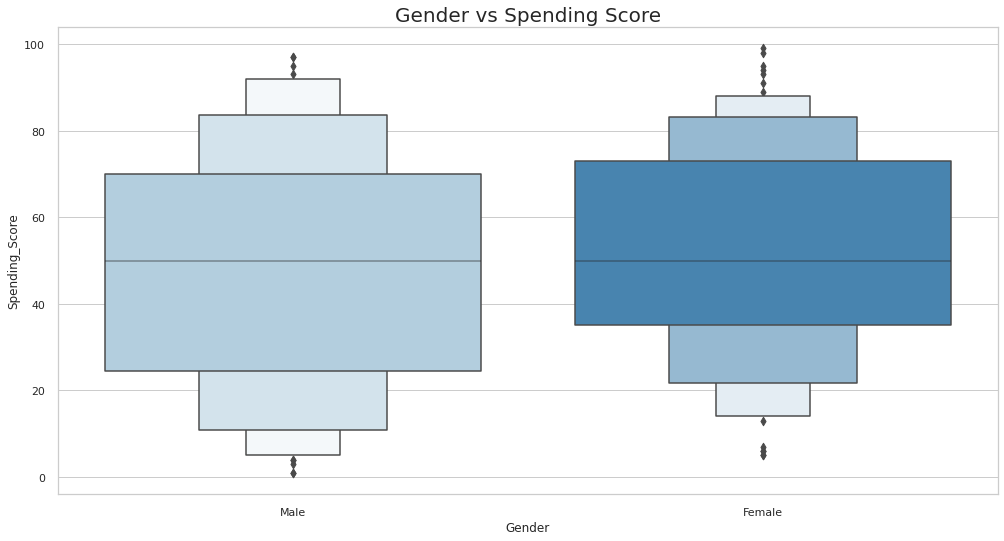

In [ ]:
#  Gender vs Spendscore
sns.boxenplot(df['Gender'], df['Spending_Score'], palette = 'Blues')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

Bi-variate Analysis between Gender and Spending Score,

It is clearly visible that the most of the males have a Spending Score of around 25k US Dollars to 70k US Dollars whereas the Females have a spending score of around 35k US Dollars to 75k US Dollars. which again points to the fact that women are Shopping Leaders.

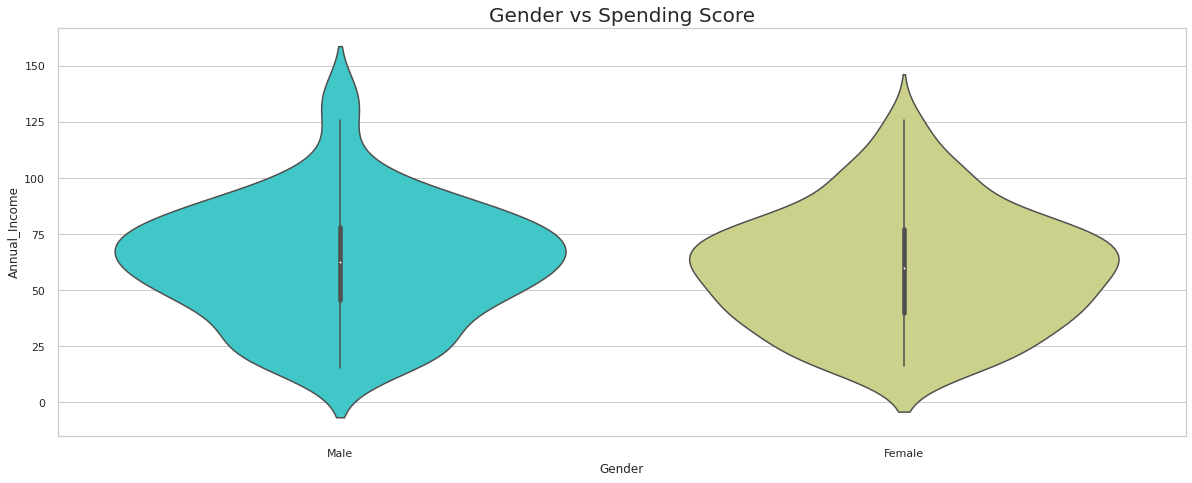

In [ ]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.violinplot(df['Gender'], df['Annual_Income'], palette = 'rainbow')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

Again a Bivariate Analysis between the Gender and the Annual Income, to better visualize the Income of the different Genders.

There are more number of males who get paid more than females. But, The number of males and females are equal in number when it comes to low annual income.

--------------------------------------------------------------------

Distribution of values in Age , Annual Income and Spending Score according to Gender

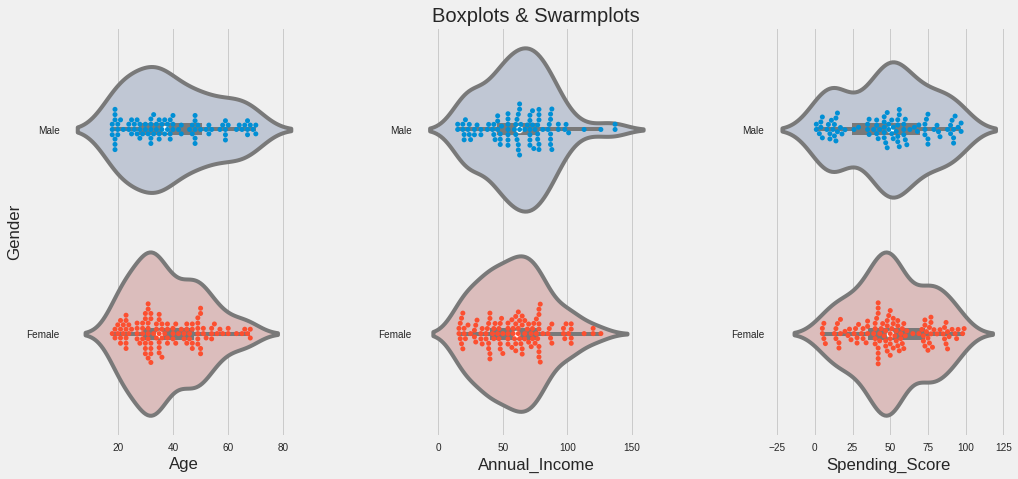

In [ ]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Annual_Income' , 'Spending_Score']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

Acoording to boxplots and Swarmplots we can observe the same pattern as we mentioned above.

## 3. Cluster Analysis

 

We can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If we use a maximum of two or three variables  for each cluster analysis, we can identify cluster labels more clearly.

First, we will use the K-Means algorithm  determine  the number of clusters (*n_clusters*). We can determine the optimal number of clusters for each cluster analysis in various ways. In this case, we  use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

We will use silhouette score  to calculate the goodness of a clustering technique.
Then we will use Hierarchical Clustering, and dendogram which shows the hierarchical relationship between objects.

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 



In [ ]:
df_age_spendscore = df.drop(columns="Gender")

##A Hopkins statistic explanation


The Hopkins statistic (introduced by Brian Hopkins and John Gordon Skellam) is a way of measuring the cluster tendency of a data set. It belongs to the family of sparse sampling tests. It acts as a statistical hypothesis test where the null hypothesis is that the data is generated by a Poisson point process and are thus uniformly randomly distributed. A value close to 1 tends to indicate the data is highly clustered, random data will tend to result in values around 0.5, and uniformly distributed data will tend to result in values close to 0

we can define hopkins func as below

from sklearn.neighbors import 

NearestNeighbors

from random import sample

from numpy.random import uniform

import numpy as np

from math import isnan

def hopkins(X):
  
  d = X.shape[1]

  #d = len(vars) # columns

  n = len(X) # rows

  m = int(0.1 * n)

  nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
  rand_X = sample(range(0, n, 1), m)
  
  ujd = []

  wjd = []

  for j in range(0, m):

     u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
    
     ujd.append(u_dist[0][1])

 w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)

     wjd.append(w_dist[0][1])
 
  H = sum(ujd) / (sum(ujd) + sum(wjd))

  if isnan(H):

     print(ujd, wjd)

     H = 0
 

 So, function hopkins compare scatter spread of data points from scaled to Random scatter data which contains no cluster tendency or properties.
Also, We might get different values each time as we have “rand_x” which gives a random set of values each time.
Hopkins test tells us that how much percentage different is our data from random scatter data.
And Yes, we can do Hopkins test before scaling or after the scaling as the scale of x-axis & y-axis changes it does not affect the spread of points.
We can conduct the Hopkins Statistic test iteratively, using 0.5 as the threshold to reject the alternative hypothesis.
That is, if H < 0.5, then it is unlikely that D has statistically significant clusters.
If the value of Hopkins statistic is close to 1, then we can reject the null hypothesis and conclude that the dataset D is significantly a clusterable data.


In [ ]:
from pyclustertend import hopkins

In [ ]:
x=df_age_spendscore

In [ ]:
hopkins(x, x.shape[0])

0.17759785677313267

we used here pyclustertend module, which is a Python toolkit for assessing cluster tendency.
as we mentioned above Hopkins test
A statistical test which allow to guess if the data follow an uniform distribution. If the test is positve (an hopkins score which tends to 0) it means that the data is not uniformly distributed. Hence clustering can be useful to classify the observations. However, if the score is too high (above 0.3 for exemple); the data is uniformly distributed and clustering can’t be really useful for the problem at hand.
So our score is 0.31055102242429633 which close to 0, we can use clustering algorithms.

#1.Segmentation using Age and Spending Score

In [ ]:
df.columns

Index(['Gender', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')

In [102]:
'''Age and spending Score'''
X1 = df[['Age' , 'Spending_Score']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

Selecting N Clusters based in Inertia (Squared Distance between Centroids and data points, should be less)

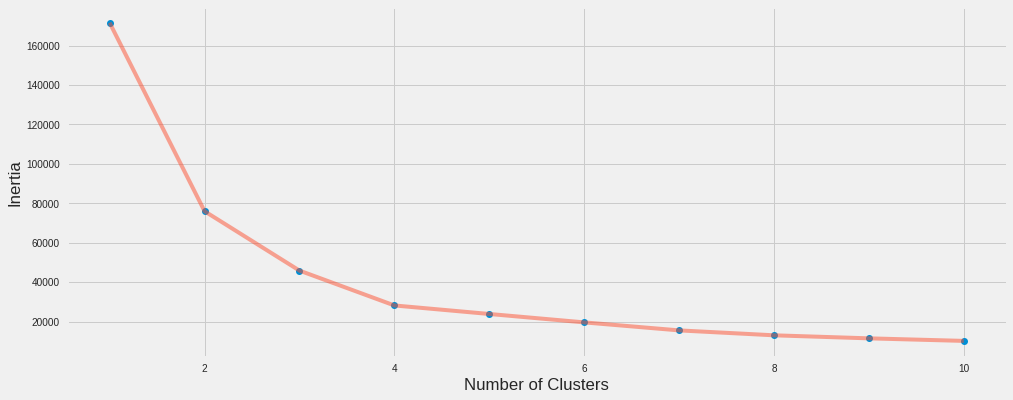

In [ ]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [ ]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [ ]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

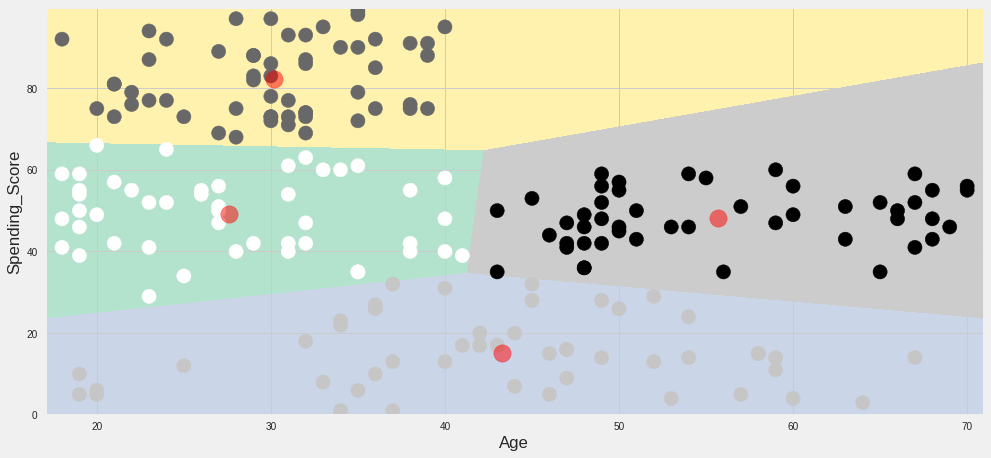

In [ ]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending_Score' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending_Score') , plt.xlabel('Age')
plt.show()

##KMeans

In [103]:
X1=pd.DataFrame(X1)


In [104]:
X1.rename(columns = {0:'Age', 1:'Spending_Score'
                              }, inplace = True)

In [105]:
kmeans1 = KMeans(n_clusters=4, random_state=111)
kmeans1.fit_predict(X1)

array([0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 0, 1, 2, 0, 2,
       1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 3, 0,
       1, 0, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0,
       0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3,
       3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 2, 0, 2, 3, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [106]:
X1['cluster_Kmeans'] = kmeans1.fit_predict(X1) #kmeans1.labels_
X1.sample(15)

,Age,Spending_Score,cluster_Kmeans
0,19,39,0
30,60,4,1
173,36,92,2
111,19,54,0
156,37,1,1
127,40,95,2
96,47,47,3
146,48,36,3
56,51,50,3
128,59,11,1


##silhouette_score
Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

Silhouette Score = (b-a)/max(a,b)
where

a= average intra-cluster distance i.e the average distance between each point within a cluster.

b= average inter-cluster distance i.e the average distance between all clusters.

We can say that the clusters are well apart from each other as the silhouette score is closer to 1.

In [107]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X1)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4686685639353608
For n_clusters=3, the silhouette score is 0.45236417162972664
For n_clusters=4, the silhouette score is 0.5018968750369411
For n_clusters=5, the silhouette score is 0.4338155364879097
For n_clusters=6, the silhouette score is 0.4378700490173415
For n_clusters=7, the silhouette score is 0.4220310908527047
For n_clusters=8, the silhouette score is 0.4316049333527262
For n_clusters=9, the silhouette score is 0.4128081636867816
For n_clusters=10, the silhouette score is 0.4141517181173595


We can observe  that, the higest  the silhouette score is 0.49973941540141753with n_clusters=4.We can use n=4 for our models but we need to also check with dendrogram

##SilhouetteVisualizer
The Silhouette Coefficient is used when the ground-truth about the dataset is unknown and computes the density of clusters computed by the model. The score is computed by averaging the silhouette coefficient for each sample, computed as the difference between the average intra-cluster distance and the mean nearest-cluster distance for each sample, normalized by the maximum value. This produces a score between 1 and -1, where 1 is highly dense clusters and -1 is completely incorrect clustering.

The Silhouette Visualizer displays the silhouette coefficient for each sample on a per-cluster basis, visualizing which clusters are dense and which are not. This is particularly useful for determining cluster imbalance, or for selecting a value for K by comparing multiple visualizers.

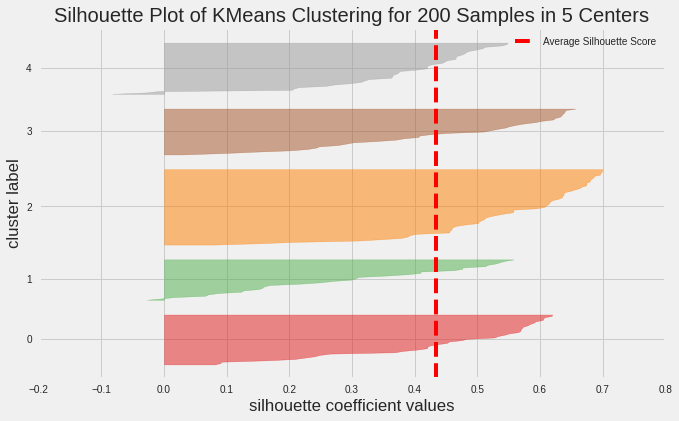

In [143]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model5 = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(model5)

visualizer.fit(X1)    # Fit the data to the visualizer
visualizer.poof();

Notice that graph contains  long silhouettes. In addition, the vertical red-dotted line on the plot indicates the average silhouette score for all observations.we can observe from SilhouetteVisualizer graph red labeled cluster has highest score and this cluster contains more observations than others.We can also check intraclusters. 

##Intercluster Distance Maps
Intercluster distance maps display an embedding of the cluster centers in 2 dimensions with the distance to other centers preserved, e.g. the closer two centers are in the visualization, the closer they are in the original feature space.

The clusters are sized according to a scoring metric. 

In [141]:
from yellowbrick.cluster import InterclusterDistance, KElbowVisualizer, SilhouetteVisualizer



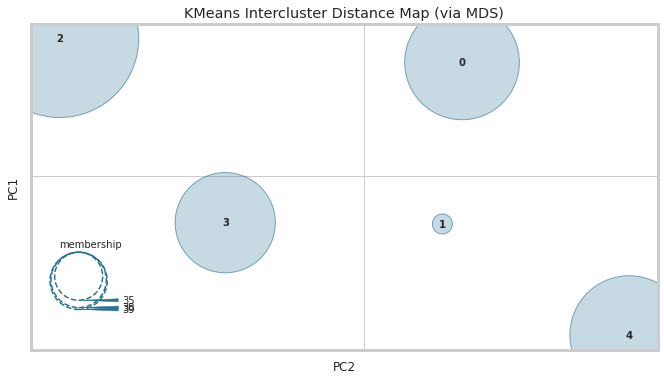

In [212]:
# Instantiate the clustering model and visualizer
model = KMeans(n_clusters=5, random_state=42)
visualizer = InterclusterDistance(model)

visualizer.fit(X1)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

It can be seen clearly in the above figure that each cluster is well apart from each other.

##Hierarchical Clustering and Dendrogram
A dendrogram is a diagram that shows the hierarchical relationship between objects. It is most commonly created as an output from hierarchical clustering. The main use of a dendrogram is to work out the best way to allocate objects to clusters.

In [108]:
from scipy.cluster.hierarchy import linkage

In [144]:
hc_ward = linkage(y = X1, method = "ward")
hc_complete = linkage(X1, "complete")
hc_average = linkage(X1, "average")
hc_single = linkage(X1, "single")

In [110]:
from scipy.cluster.hierarchy import dendrogram

 The dendrogram below shows the hierarchical clustering of observations.

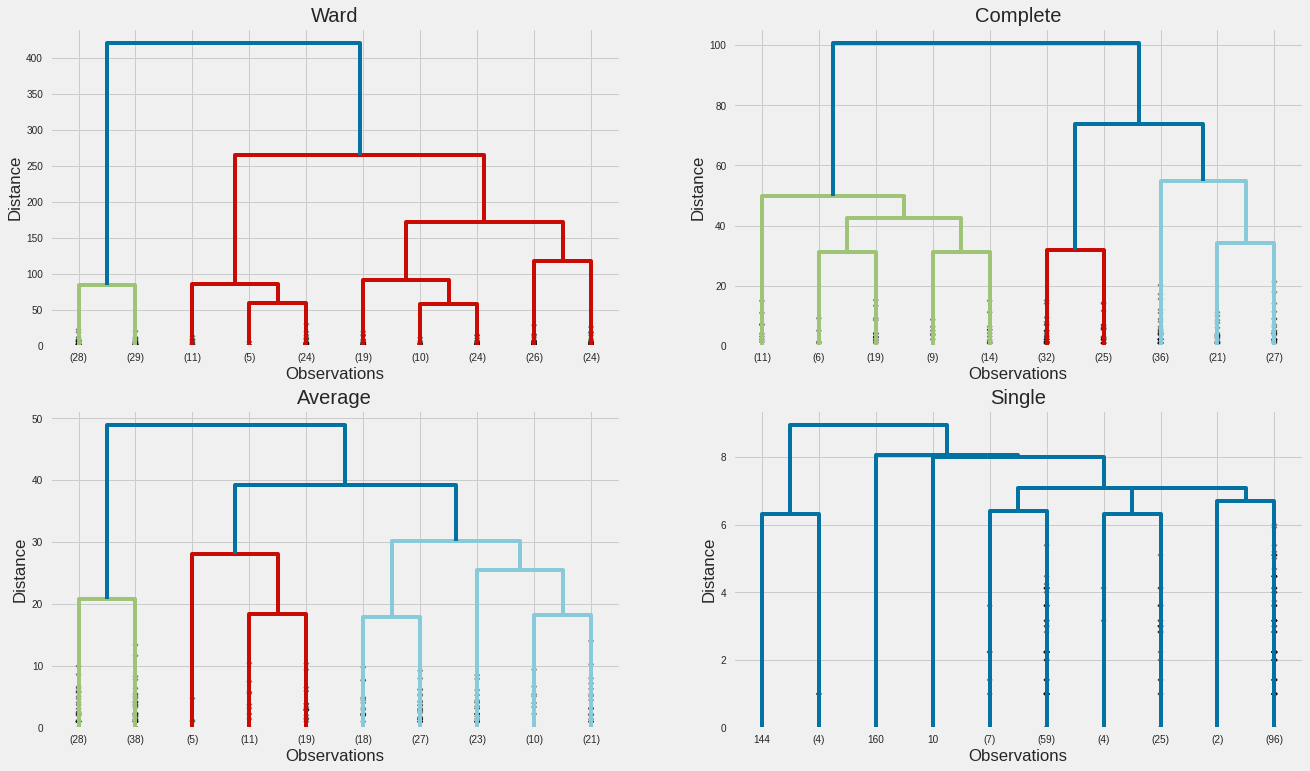

In [145]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

We could conclude that ward dendrogram gives us meaningful clustering method.We can easily see that chosing  4 cluster may be  the best choise for our data.

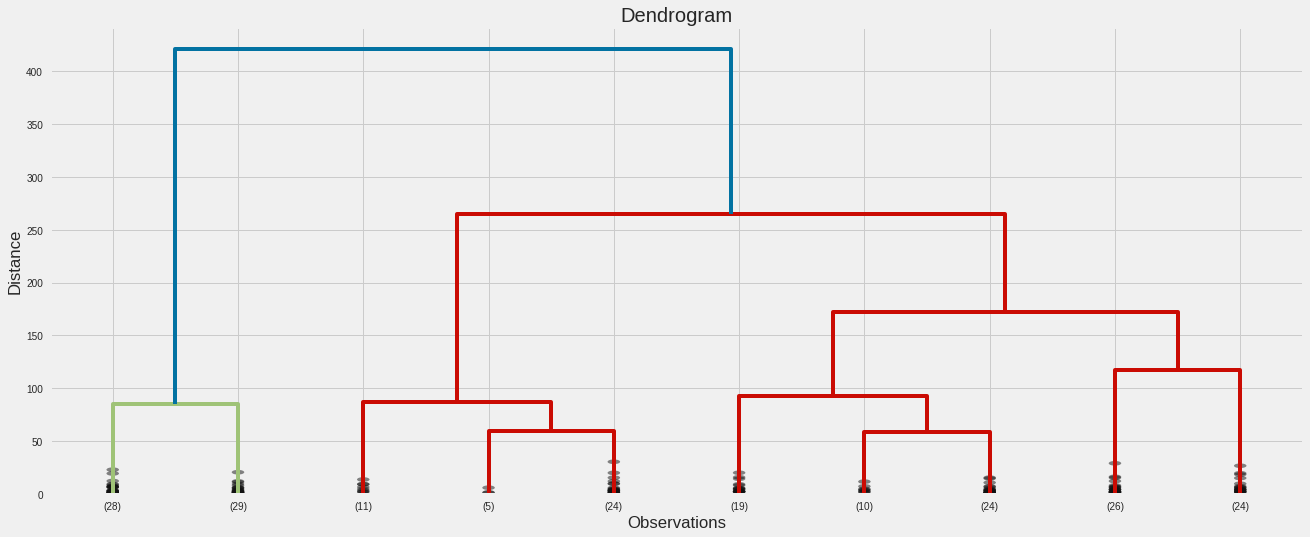

In [146]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

The dendrogram above shows us also the distance,when we drive a line at distince 120, the difference between 120 to 420 ,300(shows 4 cluster) would be higher than distance between e.g 90 to 120 etc. we can also check with AgglomerativeClustering methode by applying silhouette_score. 

##AgglomerativeClustering
Agglomerative clustering works in a “bottom-up” manner. That is, each object is initially considered as a single-element cluster (leaf). At each step of the algorithm, the two clusters that are the most similar are combined into a new bigger cluster (nodes). This procedure is iterated until all points are member of just one single big cluster (root) (see figure below).

In [111]:
from sklearn.cluster import AgglomerativeClustering

In [112]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X1)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.45454592584148096
For n_clusters=3, the silhouette score is 0.4406245222112989
For n_clusters=4, the silhouette score is 0.4608405468661758
For n_clusters=5, the silhouette score is 0.4043739061256346
For n_clusters=6, the silhouette score is 0.4125751937244674
For n_clusters=7, the silhouette score is 0.4158018450743115
For n_clusters=8, the silhouette score is 0.3881443379710403
For n_clusters=9, the silhouette score is 0.39456163701637914
For n_clusters=10, the silhouette score is 0.388362398923104


According to AgglomerativeClustering  silhouette_score which is  is 0.4602496389565028 for  n_clusters=4, selection of 4 Cluster will be the most logical solution.

#### Age and Spending Score- X1

In [113]:
Agg2 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_agg2 = Agg2.fit_predict(X1)

In [114]:
X1['cluster_Agg'] = y_agg2
X1.head()

,Age,Spending_Score,cluster_Kmeans,cluster_Agg
0,19,39,0,4
1,21,81,2,1
2,20,6,1,2
3,23,77,2,1
4,31,40,0,3


#2.Segmentation using Annual Income and Spending Score

In [ ]:
df.columns

Index(['Gender', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')

In [115]:
'''Annual Income and spending Score'''
X2 = df[['Annual_Income' , 'Spending_Score']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

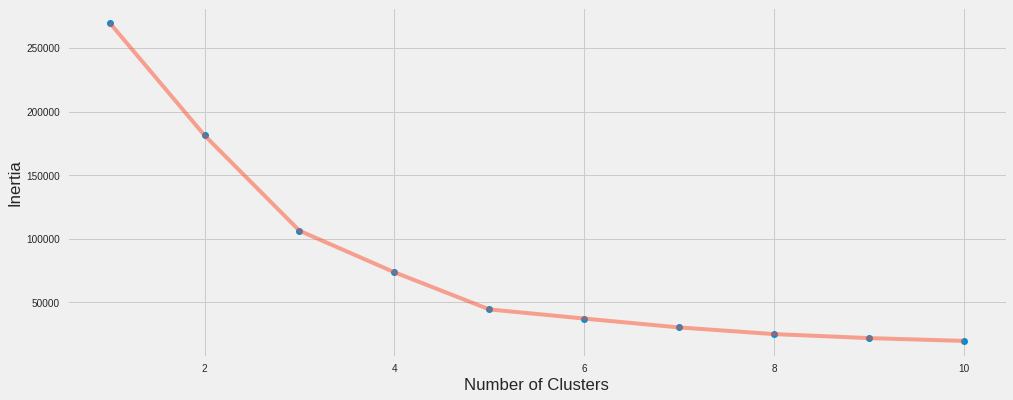

In [ ]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

According to elbow method 3, 4 or 5 cluster seems seem to be a good solution.But we need to use other evaluation visualization methods.

In [ ]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [ ]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

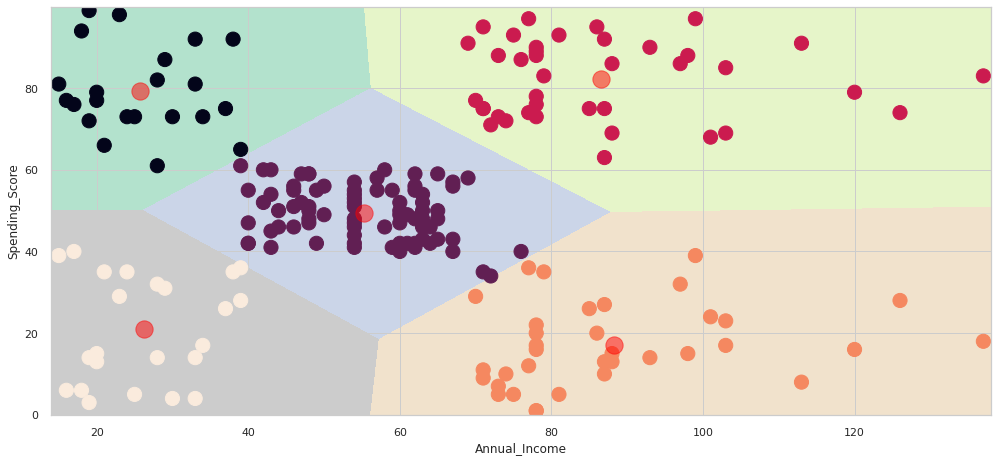

In [ ]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual_Income' ,y = 'Spending_Score' , data = df , c = labels2 , 
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending_Score') , plt.xlabel('Annual_Income')
plt.show()

##KMeans

In [116]:
X2=pd.DataFrame(X2)


In [117]:
X2.rename(columns = {0:'Annual_Income', 1:'Spending_Score'
                              }, inplace = True)

In [118]:
kmeans1 = KMeans(n_clusters=5, random_state=111)
kmeans1.fit_predict(X1)

array([1, 3, 4, 3, 1, 3, 4, 3, 2, 3, 2, 3, 2, 3, 4, 3, 1, 1, 2, 3, 1, 3,
       2, 3, 2, 3, 2, 1, 4, 3, 2, 3, 2, 3, 2, 3, 4, 3, 4, 3, 0, 3, 0, 1,
       2, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 3, 4, 3, 0, 3, 2, 3, 2, 3,
       1, 3, 4, 3, 2, 3, 4, 3, 2, 3, 1, 3, 4, 3, 0, 3, 4, 3, 2, 3, 2, 3,
       2, 3, 4, 3, 4, 3, 0, 3, 4, 3, 2, 3, 4, 3, 4, 1, 4, 3, 4, 3, 2, 3,
       2, 3, 2, 3, 4, 3, 2, 3, 1, 3, 2, 3, 4, 3, 4, 3, 4, 3, 2, 3, 2, 3,
       4, 3], dtype=int32)

In [119]:
X2['cluster_Kmeans'] = kmeans1.fit_predict(X2) #kmeans1.labels_
X2.sample(15)

,Annual_Income,Spending_Score,cluster_Kmeans
140,75,5,3
134,73,5,3
122,69,58,1
98,61,42,1
91,59,41,1
123,69,91,2
101,62,48,1
102,62,59,1
18,23,29,4
149,78,90,2


##silhouette_score


In [ ]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.53976103063432
For n_clusters=7, the silhouette score is 0.5264283703685728
For n_clusters=8, the silhouette score is 0.45827056882053113
For n_clusters=9, the silhouette score is 0.4565077334305076
For n_clusters=10, the silhouette score is 0.45925273534781125


We can observe  that, the higest  the silhouette score is 0.553931997444648 with n_clusters=5.We can use n=4 for our models but we need to also check with dendrogram and other evaluation visualization techniques.(KElbowVisualizer — visualizes the clusters according to a scoring function, looking for an "elbow" in the curve
SilhouetteVisualizer — visualizes the silhouette scores of each cluster in a single model
InterclusterDistance — visualizes the relative distance and size of clusters)

##SilhouetteVisualizer


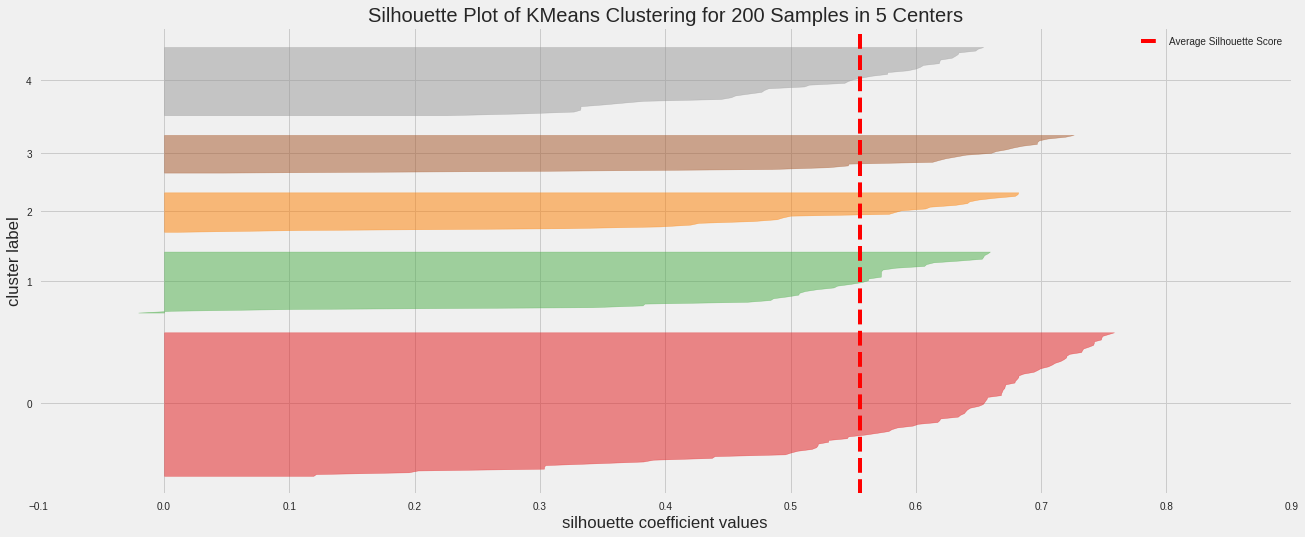

In [149]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer
plt.figure(figsize = (20,8))
model5 = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(model5)

visualizer.fit(X2)    # Fit the data to the visualizer
visualizer.poof();

Notice that graph contains  long silhouettes. In addition, the vertical red-dotted line on the plot indicates the average silhouette score for all observations.we can observe from SilhouetteVisualizer graph red labeled cluster has highest score and this cluster contains more observations than others.We can also check intraclusters. 

##Intercluster Distance Maps


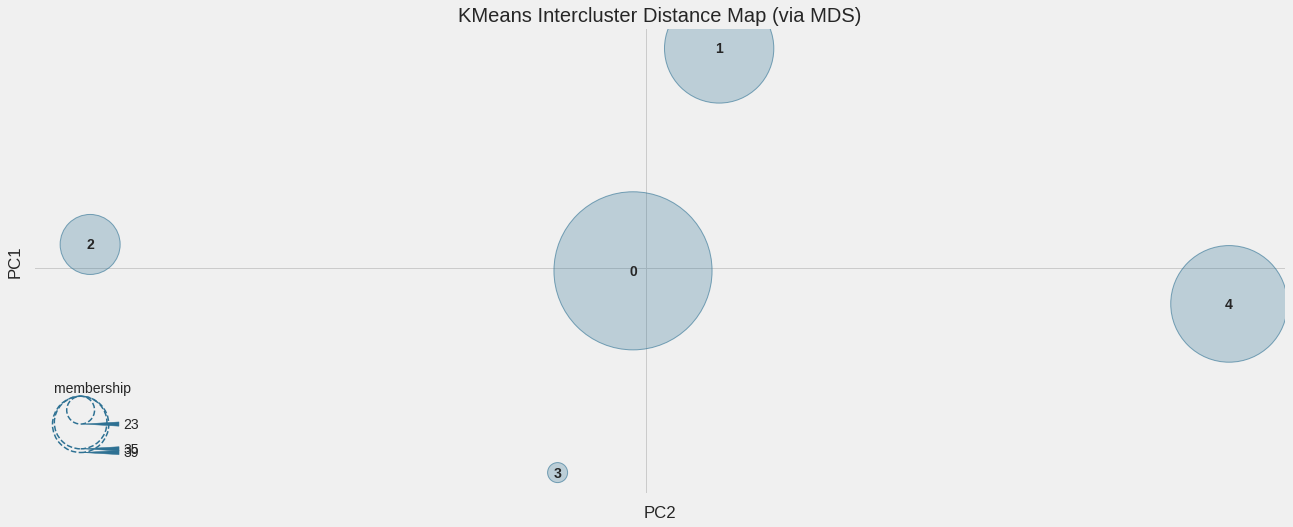

In [148]:
# Instantiate the clustering model and visualizer
plt.figure(figsize = (20,8))
model = KMeans(n_clusters=5, random_state=42)
visualizer = InterclusterDistance(model)

visualizer.fit(X2)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

It can be seen clearly in the above figure that each cluster is well apart from each other.

##Hierarchical Clustering and Dendrogram


In [120]:
hc_ward = linkage(y = X2, method = "ward")
hc_complete = linkage(X2, "complete")
hc_average = linkage(X2, "average")
hc_single = linkage(X2, "single")

 The dendrogram below shows the hierarchical clustering of observations.

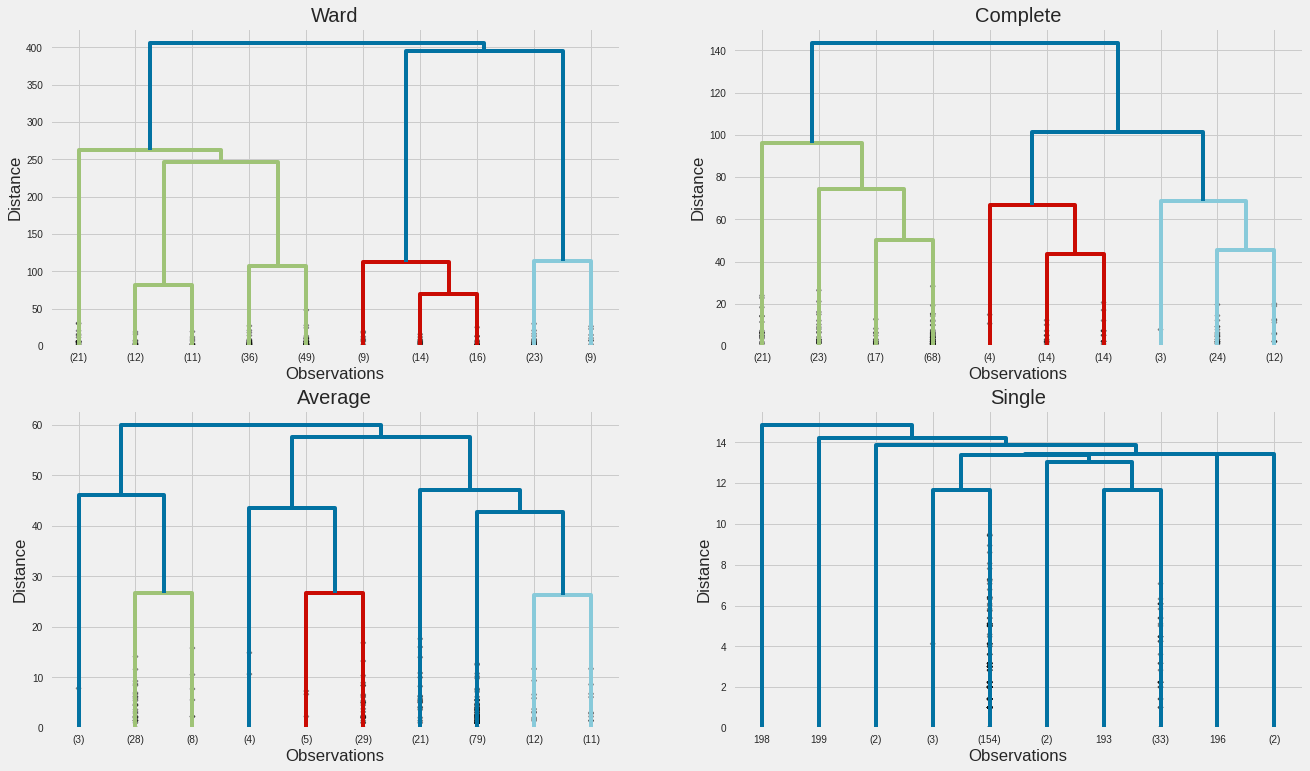

In [121]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

We could conclude that ward dendrogram gives us meaningful clustering method.We can easily see that chosing  5 cluster may be  the best choise for our data.

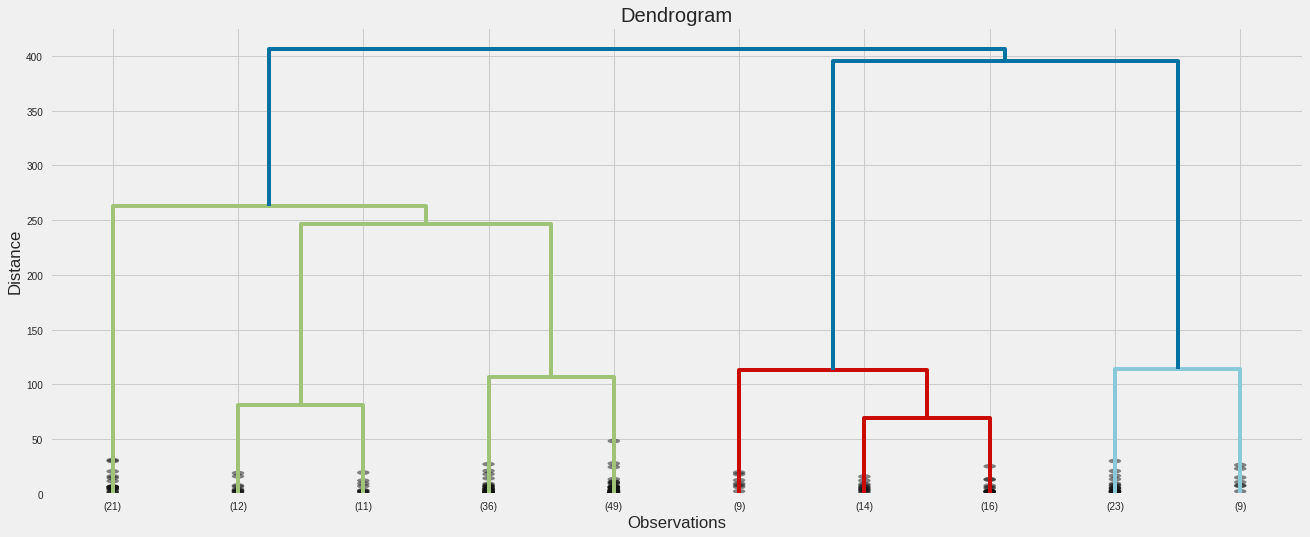

In [122]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

5 cluster seems to be logical. 

##AgglomerativeClustering


In [123]:

range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X2)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.36690802563804054
For n_clusters=3, the silhouette score is 0.46160969793911333
For n_clusters=4, the silhouette score is 0.49154378787342495
For n_clusters=5, the silhouette score is 0.5535569609107912
For n_clusters=6, the silhouette score is 0.5385402713536177
For n_clusters=7, the silhouette score is 0.5204028245074945
For n_clusters=8, the silhouette score is 0.4329347010188019
For n_clusters=9, the silhouette score is 0.43925522445463877
For n_clusters=10, the silhouette score is 0.4345877053042655


According to AgglomerativeClustering  silhouette_score which is  is 0.5529945955148897 for  n_clusters=5, selection of 5 Cluster will be the most logical solution.

#### Annual Income and Spending Score- X2

In [124]:
Agg2 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_agg2 = Agg2.fit_predict(X2)

In [125]:
X2['cluster_Agg'] = y_agg2
X2.sample(10)

,Annual_Income,Spending_Score,cluster_Kmeans,cluster_Agg
164,85,26,3,0
114,65,48,1,1
179,93,90,2,2
147,77,74,2,2
84,54,57,1,1
131,71,75,2,2
74,54,47,1,1
49,40,42,1,1
120,67,56,1,1
113,64,46,1,1


#3.Segmentation using Age , Annual Income and Spending Score

In [ ]:
df.columns

Index(['Gender', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')

In [130]:
X3 = df[['Age' , 'Annual_Income' ,'Spending_Score']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

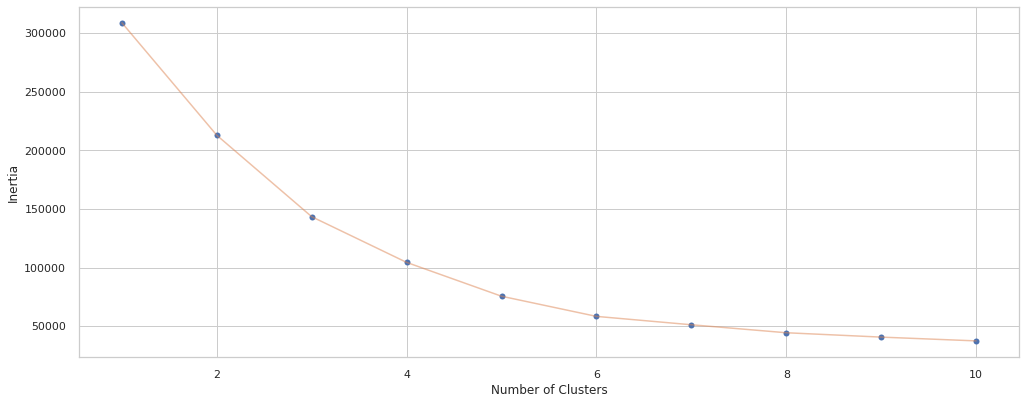

In [ ]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [ ]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [ ]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [ ]:
from mpl_toolkits import mplot3d

In [ ]:
from mpl_toolkits.mplot3d import axes3d

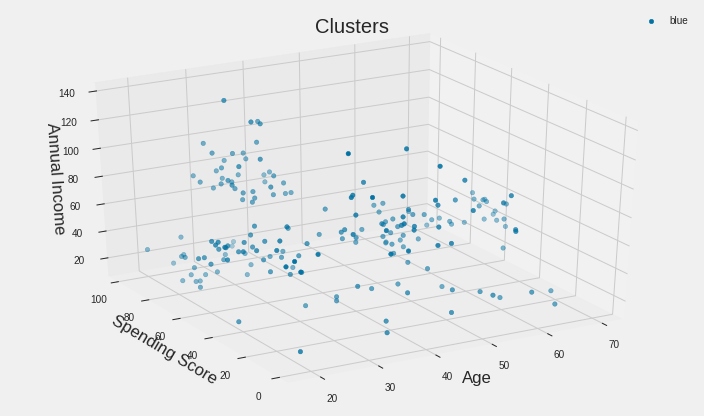

In [151]:
fig = plt.figure()

ax = fig.add_subplot(111, projection = '3d')

x1 = df['Age']
y1 = df['Spending_Score']
z1 = df['Annual_Income']



ax.view_init(elev=30, azim=-120)
ax.scatter(x1, y1, z1, c='b', marker='o', label='blue')


ax.set_xlabel('Age')
ax.set_ylabel('Spending Score')
ax.set_zlabel('Annual Income')
plt.title("Clusters")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import plotly.graph_objects as go
fig = go.Figure( go.Scatter(x=[1,2,3], y=[1,3,2] ) )
fig.show()

In [ ]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [ ]:
configure_plotly_browser_state()

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Bar(y=[2, 1, 3])],
    layout_title_text="A Figure Displayed with the 'colab' Renderer"
)
fig.show(renderer="colab")

In [154]:
df['label3'] =  labels3
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending_Score'],
    z= df['Annual_Income'],
    mode='markers',
     marker=dict(
        color = df['label3'], 
        size= 30,
        line=dict(
            color= df['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)
fig.show(renderer="colab")



##KMeans

In [131]:
X3=pd.DataFrame(X3)


In [132]:
X3.rename(columns = {0:'Age', 1:'Annual_Income', 2:'Spending_Score' }, inplace = True)

In [227]:
kmeans1 = KMeans(n_clusters=6, random_state=111)
kmeans1.fit_predict(X3)

array([4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 2, 5, 2, 0,
       4, 5, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 3, 0, 3, 1, 3, 1, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

In [228]:
X3['cluster_Kmeans'] = kmeans1.fit_predict(X3) #kmeans1.labels_
X3.sample(15)

,Age,Annual_Income,Spending_Score,cluster_Kmeans,cluster_Agg
121,38,67,40,0,0
11,35,19,99,5,3
5,22,17,76,5,3
67,68,48,48,2,0
125,31,70,77,3,2
37,30,34,73,5,3
9,30,19,72,5,3
149,34,78,90,3,2
7,23,18,94,5,3
84,21,54,57,0,0


##silhouette_score


In [ ]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X3)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X3, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.293166070535953
For n_clusters=3, the silhouette score is 0.3839349967742105
For n_clusters=4, the silhouette score is 0.40546302077733304
For n_clusters=5, the silhouette score is 0.44446409171786105
For n_clusters=6, the silhouette score is 0.4523566166018854
For n_clusters=7, the silhouette score is 0.4398198217929885
For n_clusters=8, the silhouette score is 0.42977587111050725
For n_clusters=9, the silhouette score is 0.41443894953771165
For n_clusters=10, the silhouette score is 0.3771617663736055


We can observe  that, the higest  the silhouette score is  0.4523566166018854 with n_clusters=5.We can use n=6 for our models but we need to also check with dendrogram and other evaluation visualization techniques.(KElbowVisualizer — visualizes the clusters according to a scoring function, looking for an "elbow" in the curve
SilhouetteVisualizer — visualizes the silhouette scores of each cluster in a single model
InterclusterDistance — visualizes the relative distance and size of clusters)

##SilhouetteVisualizer


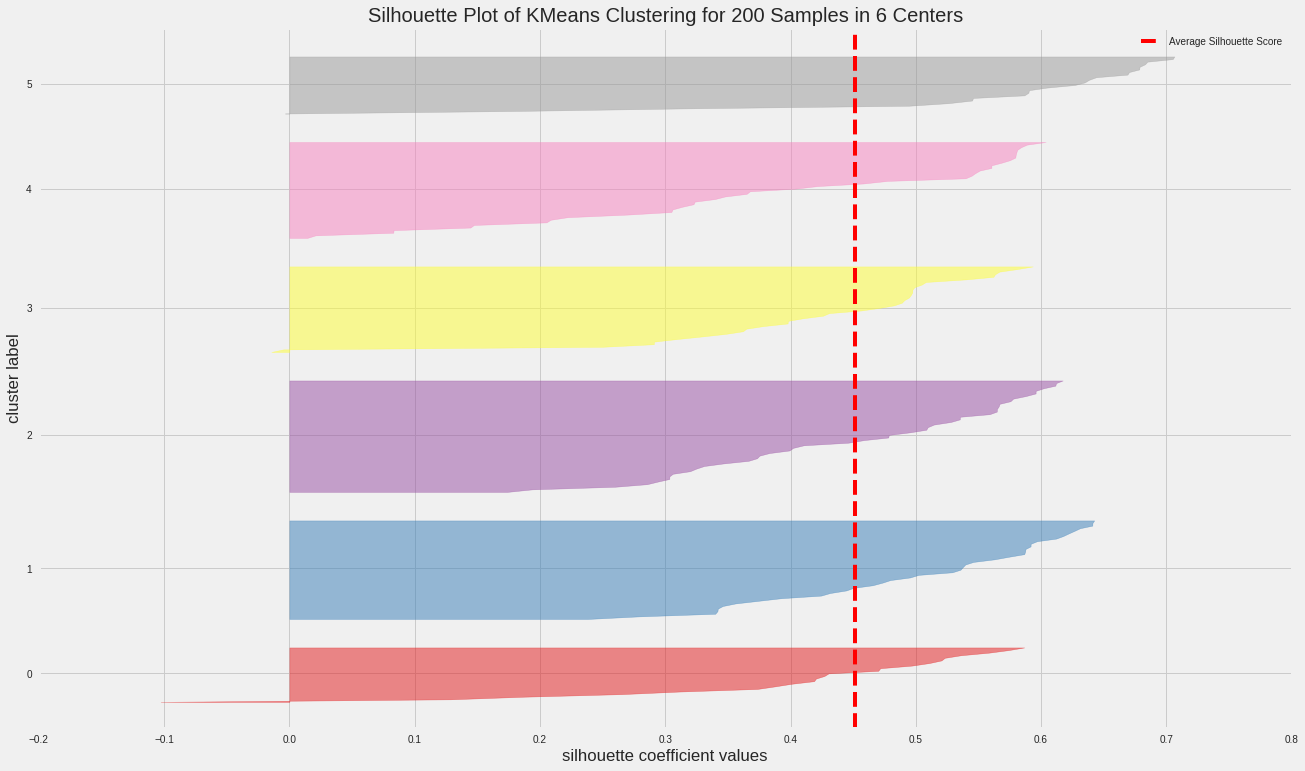

In [157]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer
plt.figure(figsize = (20,12))

model5 = KMeans(n_clusters=6, random_state=42)
visualizer = SilhouetteVisualizer(model5)

visualizer.fit(X3)    # Fit the data to the visualizer
visualizer.poof();

Notice that graph contains  long silhouettes. In addition, the vertical red-dotted line on the plot indicates the average silhouette score for all observations.we can observe from SilhouetteVisualizer graph yellow labeled cluster has highest score and this cluster contains more observations than others.We can also check intraclusters. 

##Intercluster Distance Maps


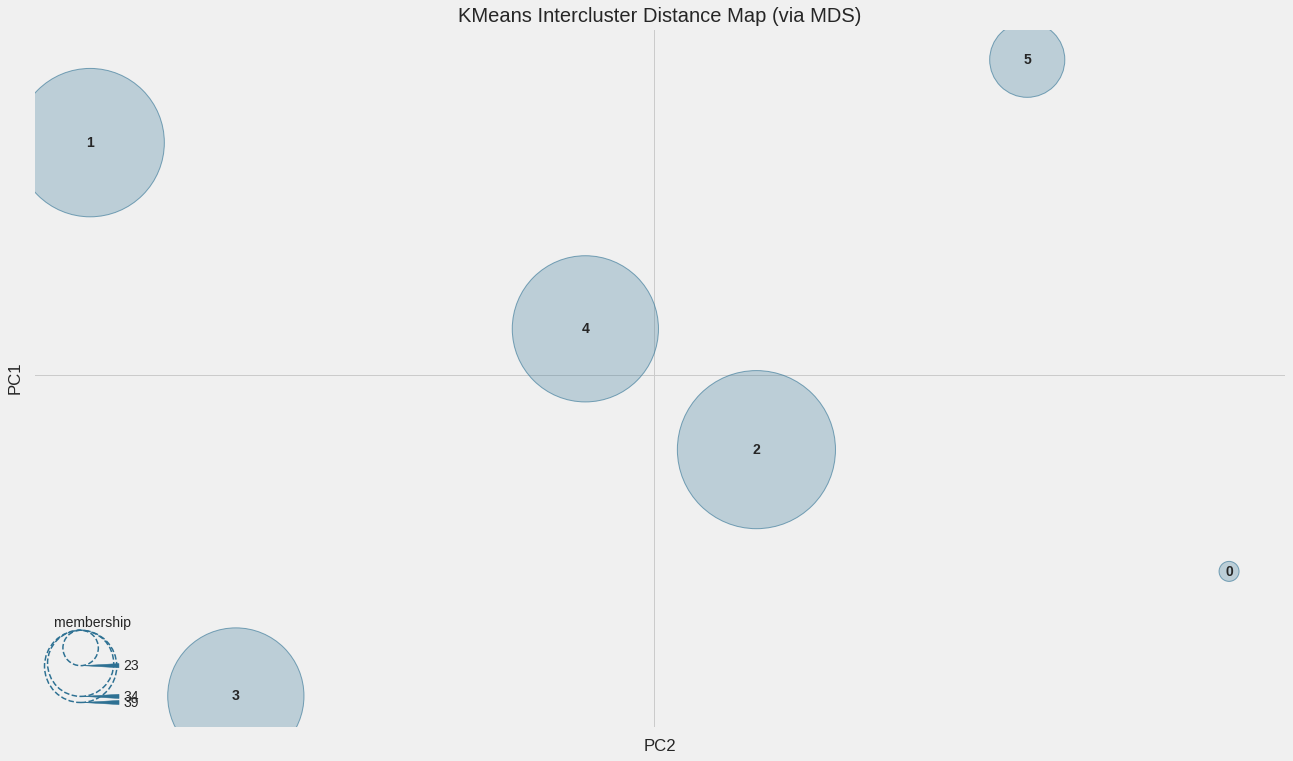

In [156]:
# Instantiate the clustering model and visualizer
plt.figure(figsize = (20,12))
model = KMeans(n_clusters=6, random_state=42)
visualizer = InterclusterDistance(model)

visualizer.fit(X3)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

It can be seen clearly in the above figure that each cluster is well apart from each other.

##Hierarchical Clustering and Dendrogram


In [135]:
hc_ward = linkage(y = X3, method = "ward")
hc_complete = linkage(X3, "complete")
hc_average = linkage(X3, "average")
hc_single = linkage(X3, "single")

 The dendrogram below shows the hierarchical clustering of observations.

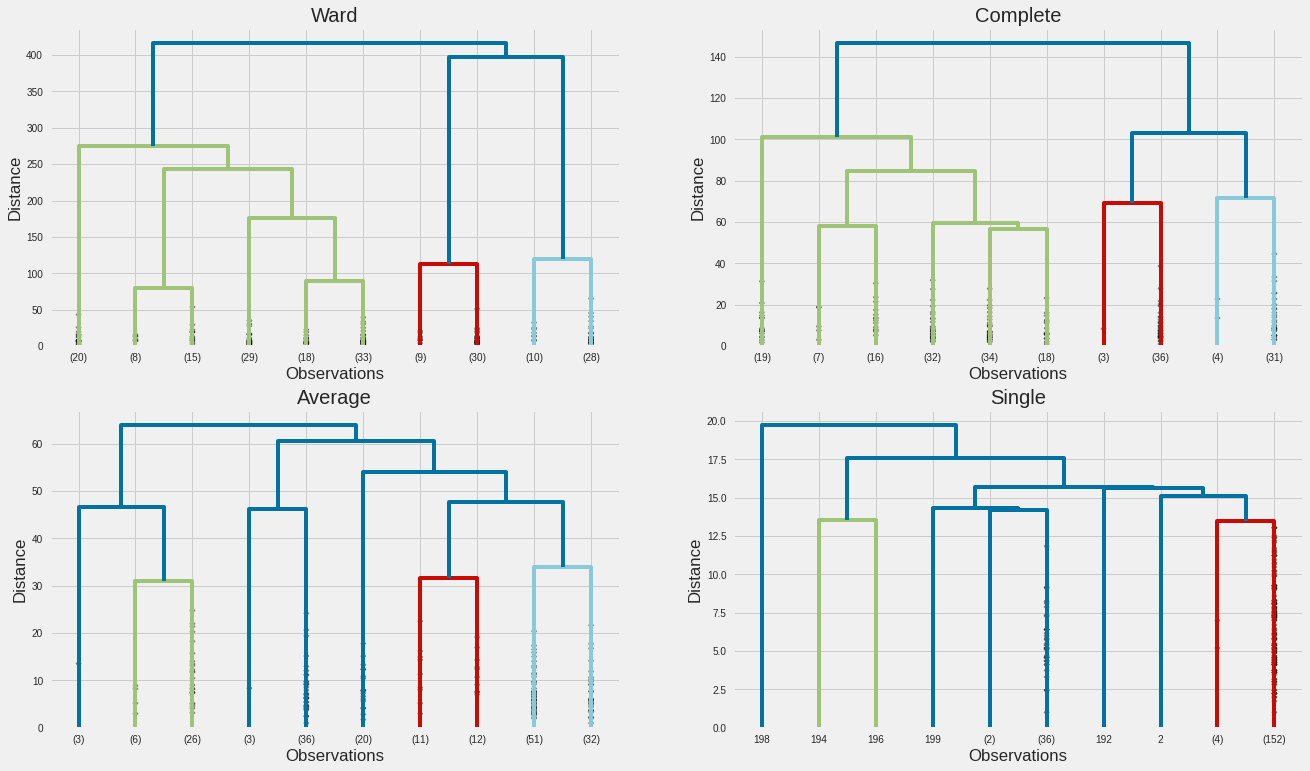

In [136]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

We could conclude that ward dendrogram gives us meaningful clustering method.We can easily see that chosing  5 cluster may be  the best choise for our data.

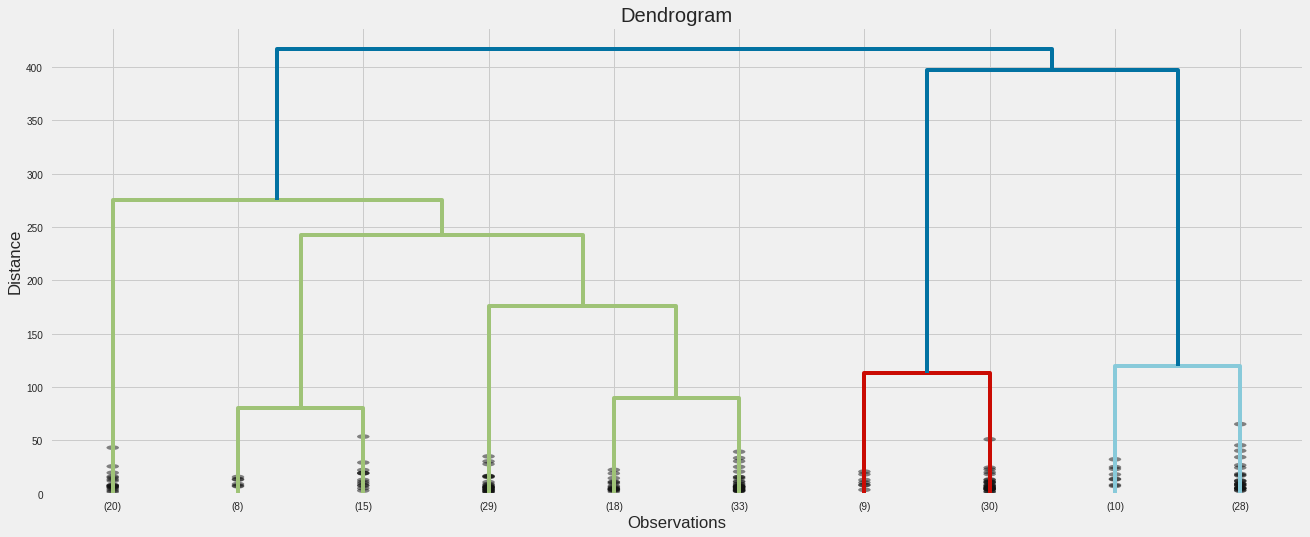

In [137]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

##AgglomerativeClustering


In [158]:

range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X3)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X3, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.29822408980786635
For n_clusters=3, the silhouette score is 0.38348222210007266
For n_clusters=4, the silhouette score is 0.41256969446350056
For n_clusters=5, the silhouette score is 0.4416088384595349
For n_clusters=6, the silhouette score is 0.4375962354940387
For n_clusters=7, the silhouette score is 0.4218568436410524
For n_clusters=8, the silhouette score is 0.4065180464154922
For n_clusters=9, the silhouette score is 0.36510004849001954
For n_clusters=10, the silhouette score is 0.35561798964314917


According to AgglomerativeClustering  silhouette_score which is  is 0.4401889024290193 for  n_clusters=5, selection of 5 Cluster will be the most logical solution.

####Age, Annual Income and Spending Score- X3

In [159]:
Agg3 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_agg3 = Agg3.fit_predict(X3)

In [160]:
X3['cluster_Agg'] = y_agg3
X3.sample(15)

,Age,Annual_Income,Spending_Score,cluster_Kmeans,cluster_Agg
133,31,72,71,1,2
9,30,19,72,4,3
110,65,63,52,0,0
182,46,98,15,2,1
25,29,28,82,4,3
33,18,33,92,4,3
143,32,76,87,1,2
7,23,18,94,4,3
118,51,67,43,0,0
106,66,63,50,0,0


--------------------------------------------------------------------------------------------------------------------------------------

## Interpretation based on Age and Spending Score

In [ ]:
X1.head()

,Age,Spending_Score,cluster_Kmeans,cluster_Agg
0,19,39,3,0
1,21,81,2,3
2,20,6,1,2
3,23,77,2,3
4,31,40,3,0


In [161]:
X1.cluster_Kmeans.value_counts()

2    57
1    48
3    48
0    47
Name: cluster_Kmeans, dtype: int64

In [174]:
import warnings
warnings.filterwarnings('ignore')

In [178]:
#hide the warnings in the pink boxes
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

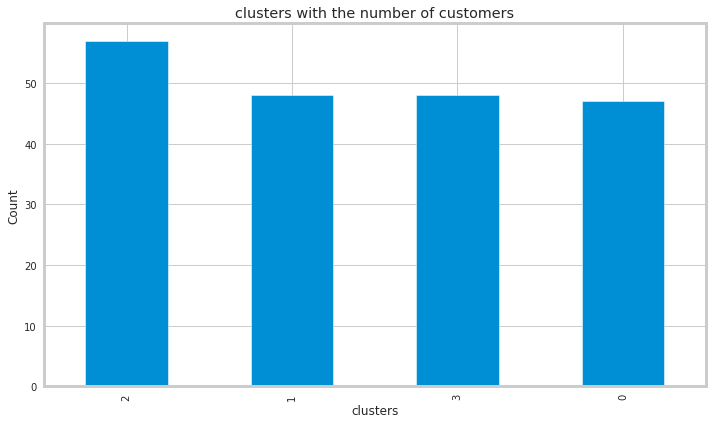

In [189]:

# lets see the number of poeple lie in each group
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = X1.cluster_Kmeans.value_counts().plot(kind='bar')

#ax.bar_label(ax.containers[0]);
plt.tight_layout()


In [198]:
df.columns

Index(['Gender', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')

In [170]:
df_X1=df.copy()

In [171]:
df_X1["cluster_Age_Spending_Score"] = X1.cluster_Kmeans
df_X1.head()

,Gender,Age,Annual_Income,Spending_Score,cluster_Age_Spending_Score
0,Male,19,15,39,0
1,Male,21,15,81,2
2,Female,20,16,6,1
3,Female,23,16,77,2
4,Female,31,17,40,0


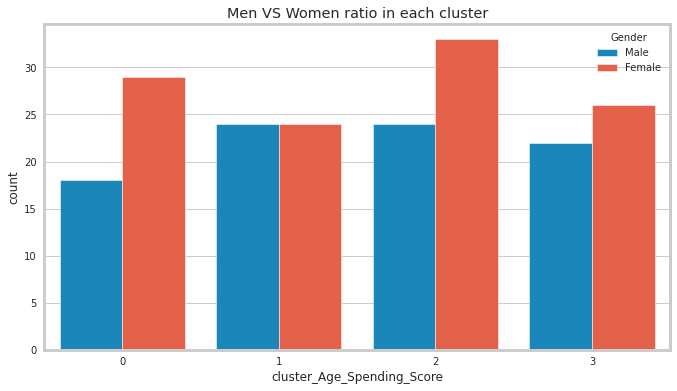

In [193]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=df_X1.cluster_Age_Spending_Score, hue=df_X1.Gender)


In [194]:
df_X1.groupby("cluster_Age_Spending_Score").mean()

,Age,Annual_Income,Spending_Score
cluster_Age_Spending_Score,,,
0,27.617,53.277,49.149
1,43.292,66.938,15.021
2,30.175,66.070,82.351
3,55.708,54.771,48.229


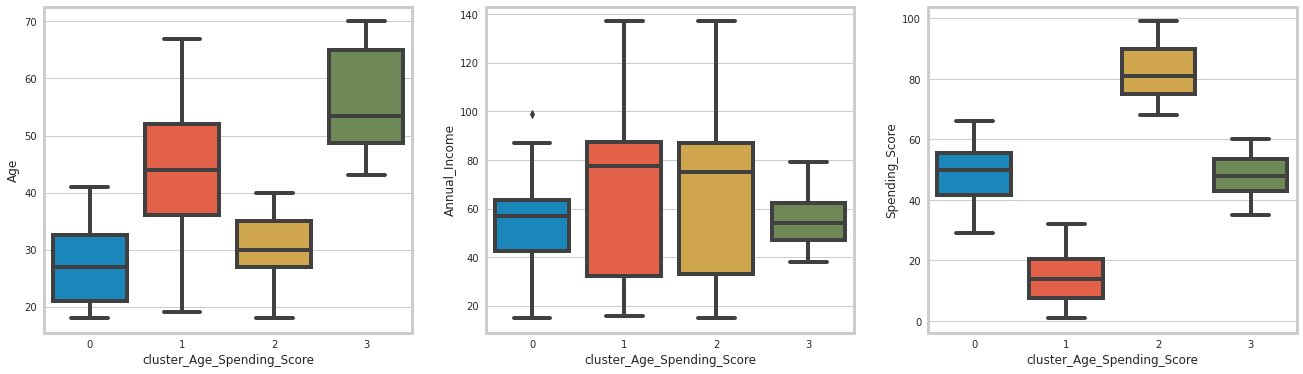

In [195]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y = "Age", x = "cluster_Age_Spending_Score", data = df_X1)

plt.subplot(132)
sns.boxplot(y = "Annual_Income", x = "cluster_Age_Spending_Score",  data = df_X1)

plt.subplot(133)
sns.boxplot(y = "Spending_Score", x = "cluster_Age_Spending_Score", data = df_X1)

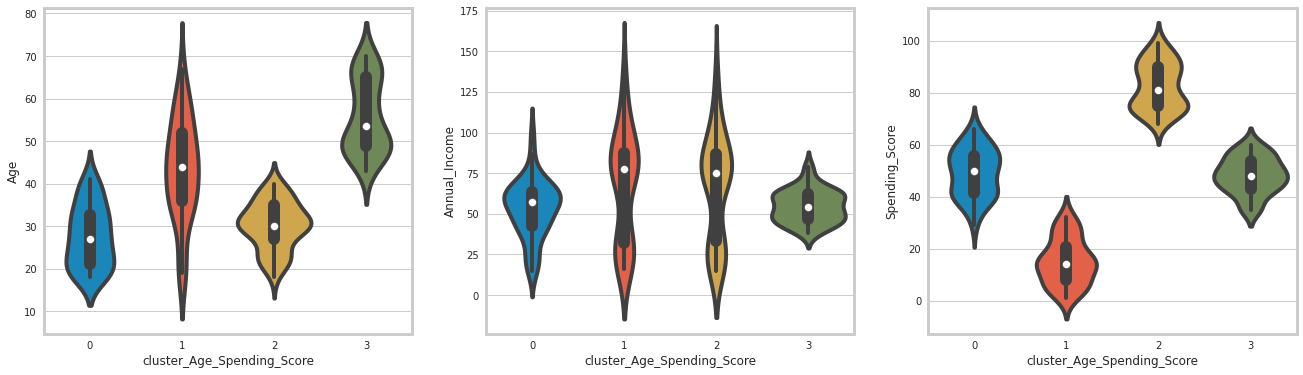

In [196]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.violinplot(y = "Age", x = "cluster_Age_Spending_Score", data = df_X1)

plt.subplot(132)
sns.violinplot(y = "Annual_Income", x = "cluster_Age_Spending_Score",  data = df_X1)

plt.subplot(133)
sns.violinplot(y = "Spending_Score", x = "cluster_Age_Spending_Score", data = df_X1)

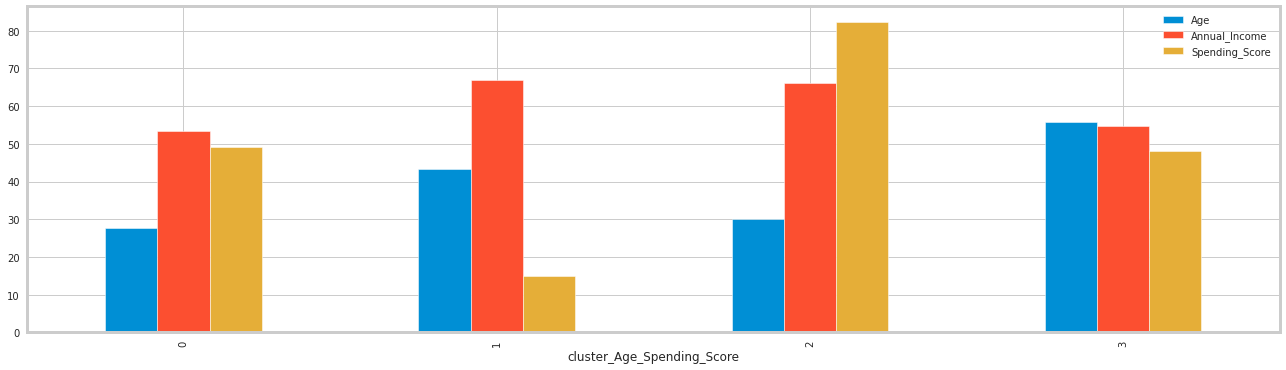

In [197]:
ax =df_X1.groupby("cluster_Age_Spending_Score").mean().plot(kind='bar', figsize = (20,6))


**cluster 0**: The average age is around 25.both annual_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.


**cluster 1**: The average age is around 45, the annual_income is high but the spending_scores are very low. 
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annual_income is high and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.  
**cluster 3** : The average age is around 55, both annual income
 and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

    


## Interpretation based on Annual Income and Spending Score

In [ ]:
X2

In [200]:
X2.cluster_Kmeans.value_counts()

1    81
2    39
3    35
4    23
0    22
Name: cluster_Kmeans, dtype: int64

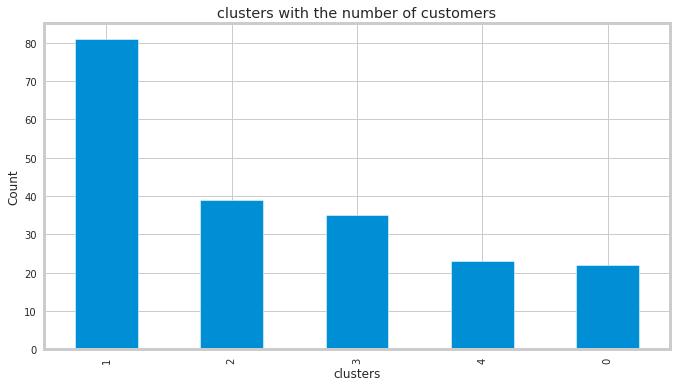

In [203]:
# lets see the number of poeple lie in each group
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = X2.cluster_Kmeans.value_counts().plot(kind='bar')


In [204]:
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [205]:
df_X2=df.copy()

In [206]:
df_X2["cluster_Annual_Income_Spending_Score"] = X2.cluster_Kmeans
df_X2.head()

,Gender,Age,Annual_Income,Spending_Score,cluster_Annual_Income_Spending_Score
0,Male,19,15,39,4
1,Male,21,15,81,0
2,Female,20,16,6,4
3,Female,23,16,77,0
4,Female,31,17,40,4


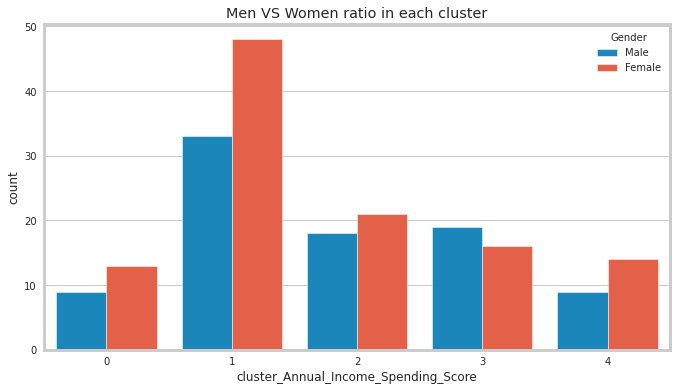

In [207]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=df_X2.cluster_Annual_Income_Spending_Score, hue=df_X2.Gender)


In [208]:
df_X2.groupby(["Gender", "cluster_Annual_Income_Spending_Score"]).mean()

Age  Annual_Income  \
Gender cluster_Annual_Income_Spending_Score                         
Female 0                                    25.462         25.692   
       1                                    40.896         55.354   
       2                                    32.190         86.048   
       3                                    43.250         90.938   
       4                                    43.214         27.357   
Male   0                                    25.000         25.778   
       1                                    45.364         55.212   
       2                                    33.278         87.111   
       3                                    39.316         85.895   
       4                                    48.333         24.667   

                                             Spending_Score  
Gender cluster_Annual_Income_Spending_Score                  
Female 0                                             80.538  
       1                                             49.000  
       2                                             81.667  
       3                                             22.062  
       4                                             21.714  
Male   0                                             77.667  
       1                                             50.273  
       2                                             82.667  
       3                                             12.947  
       4                                             19.667

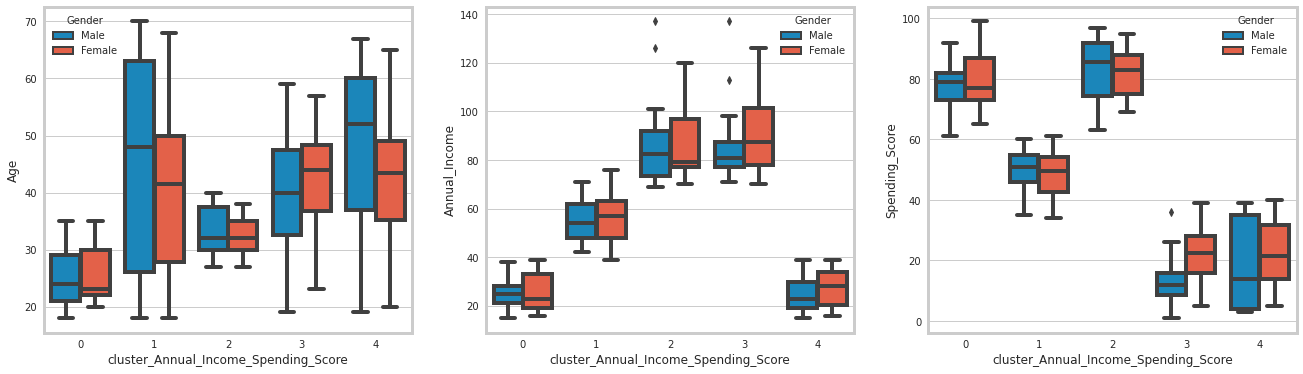

In [209]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y = "Age", x = "cluster_Annual_Income_Spending_Score", hue= "Gender", data = df_X2)

plt.subplot(132)
sns.boxplot(y = "Annual_Income", x = "cluster_Annual_Income_Spending_Score", hue= "Gender", data = df_X2)

plt.subplot(133)
sns.boxplot(y = "Spending_Score", x = "cluster_Annual_Income_Spending_Score", hue= "Gender", data = df_X2)

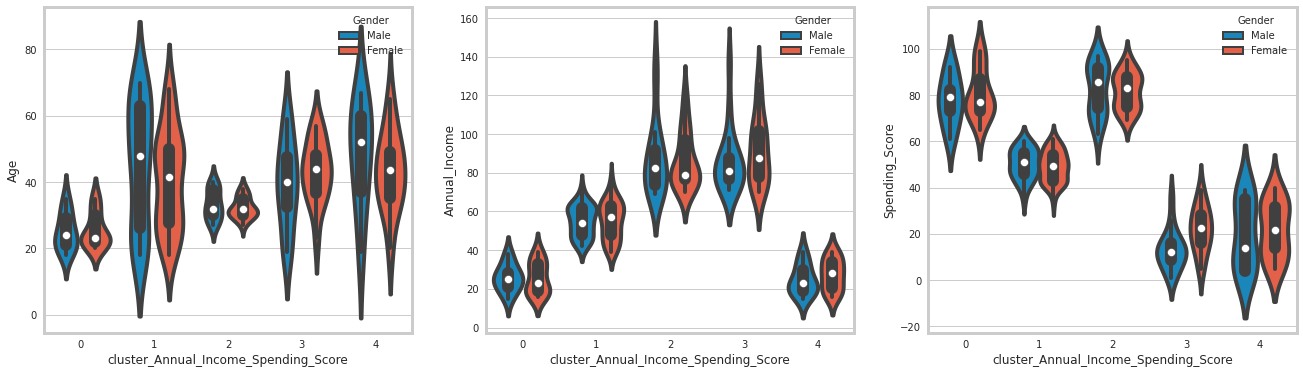

In [210]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.violinplot(y = "Age", x = "cluster_Annual_Income_Spending_Score", hue= "Gender", data = df_X2)

plt.subplot(132)
sns.violinplot(y = "Annual_Income", x = "cluster_Annual_Income_Spending_Score", hue= "Gender", data = df_X2)

plt.subplot(133)
sns.violinplot(y = "Spending_Score", x = "cluster_Annual_Income_Spending_Score", hue= "Gender", data = df_X2)

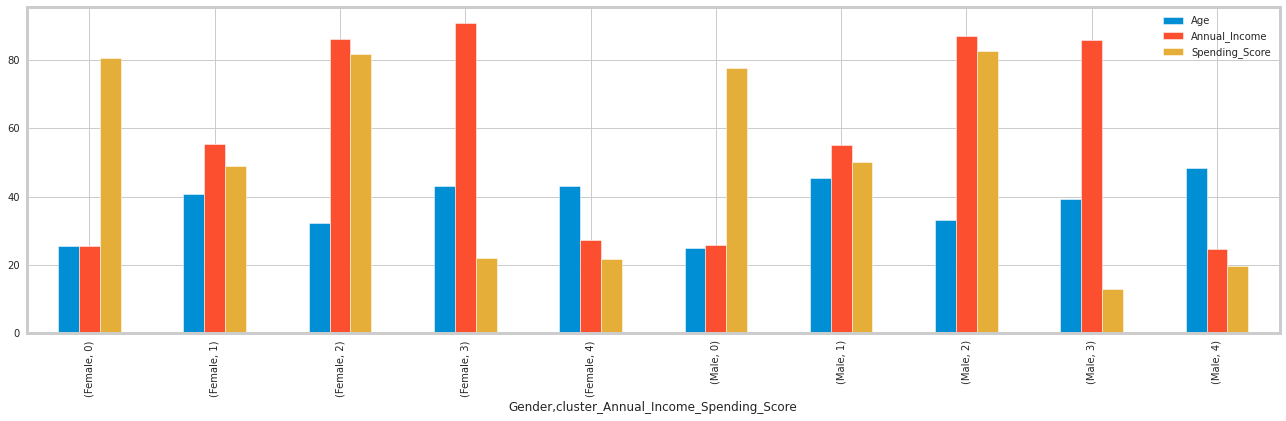

In [211]:
ax = df_X2.groupby(["Gender", "cluster_Annual_Income_Spending_Score"]).mean().plot(kind="bar", figsize=(20,6))


## Conclusion

### Female
**cluster 0**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 1** : The average age is around 40, both annual income
 and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 2**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

**cluster 3**: The average age is around 42, the annual income
 is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 4** :The average age is around 42. Both annual income
 and spending_scores are low. It can be 
directed to shopping with gift certificates.





### Male

**cluster 0**: The average age is around 25. Low annual income but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 1** : The average age is around 45, both annual income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 2**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

**cluster 3**: The average age is around 40, the annual income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 4** :The average age is around 50. Both annual income and spending_scores are low. It can be 
directed to shopping with gift certificates.



## Interpretation based on Age , Annual Income and Spending Score

In [213]:
X3.head()

,Age,Annual_Income,Spending_Score,cluster_Kmeans,cluster_Agg
0,19,15,39,3,4
1,21,15,81,4,3
2,20,16,6,3,4
3,23,16,77,4,3
4,31,17,40,3,4


In [229]:
X3.cluster_Kmeans.value_counts()

2    45
3    39
0    38
1    35
5    22
4    21
Name: cluster_Kmeans, dtype: int64

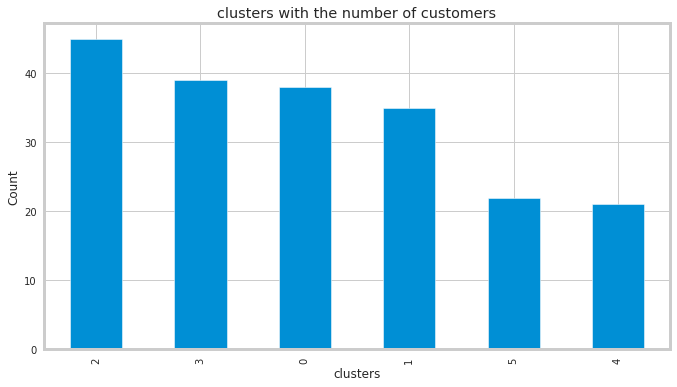

In [230]:
# lets see the number of poeple lie in each group
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = X3.cluster_Kmeans.value_counts().plot(kind='bar')


In [231]:
df_X3=df.copy()

In [232]:
df_X3["cluster_Age_Annual_Income_Spending_Score"] = X3.cluster_Kmeans
df_X3.sample(10)

,Gender,Age,Annual_Income,Spending_Score,cluster_Age_Annual_Income_Spending_Score
85,Male,48,54,46,2
58,Female,27,46,51,0
14,Male,37,20,13,4
152,Female,44,78,20,1
143,Female,32,76,87,3
86,Female,55,57,58,2
66,Female,43,48,50,2
105,Female,21,62,42,0
134,Male,20,73,5,1
184,Female,41,99,39,1


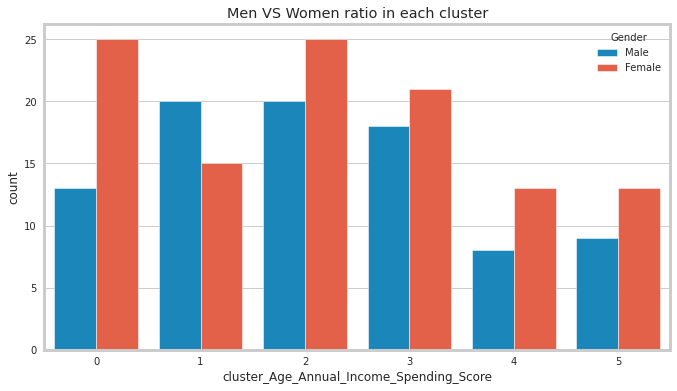

In [233]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=df_X3.cluster_Age_Annual_Income_Spending_Score, hue=df_X3.Gender)


In [234]:
df_X3.groupby(["Gender", "cluster_Age_Annual_Income_Spending_Score"]).mean()

Age  Annual_Income  \
Gender cluster_Age_Annual_Income_Spending_Score                         
Female 0                                        27.960         57.360   
       1                                        44.600         92.333   
       2                                        54.080         53.240   
       3                                        32.190         86.048   
       4                                        41.538         26.538   
       5                                        25.462         25.692   
Male   0                                        25.154         55.308   
       1                                        39.500         85.150   
       2                                        58.750         53.550   
       3                                        33.278         87.111   
       4                                        48.375         22.875   
       5                                        25.000         25.778   

                                                 Spending_Score  
Gender cluster_Age_Annual_Income_Spending_Score                  
Female 0                                                 47.120  
       1                                                 21.600  
       2                                                 49.520  
       3                                                 81.667  
       4                                                 20.692  
       5                                                 80.538  
Male   0                                                 53.000  
       1                                                 14.050  
       2                                                 48.550  
       3                                                 82.667  
       4                                                 17.625  
       5                                                 77.667

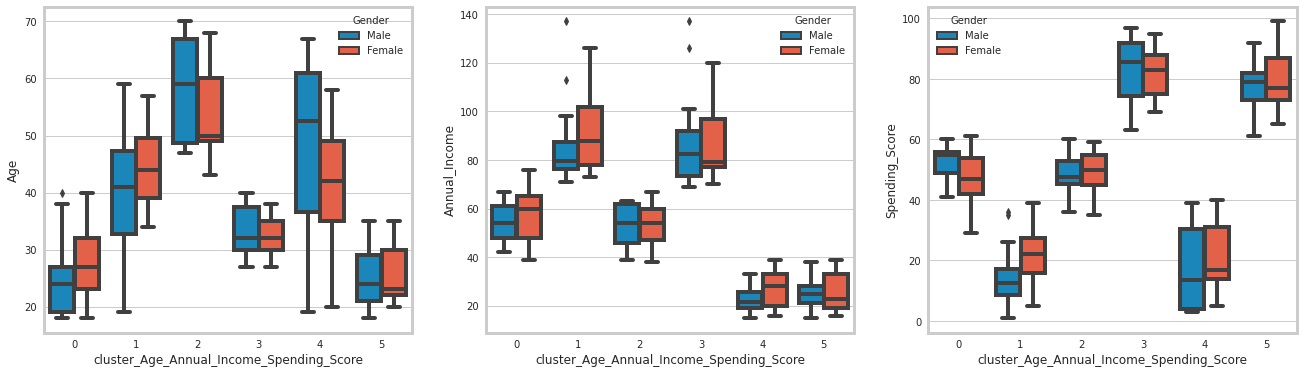

In [236]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y = "Age", x = "cluster_Age_Annual_Income_Spending_Score", hue= "Gender", data = df_X3)

plt.subplot(132)
sns.boxplot(y = "Annual_Income", x = "cluster_Age_Annual_Income_Spending_Score", hue= "Gender", data = df_X3)

plt.subplot(133)
sns.boxplot(y = "Spending_Score", x = "cluster_Age_Annual_Income_Spending_Score", hue= "Gender", data = df_X3)

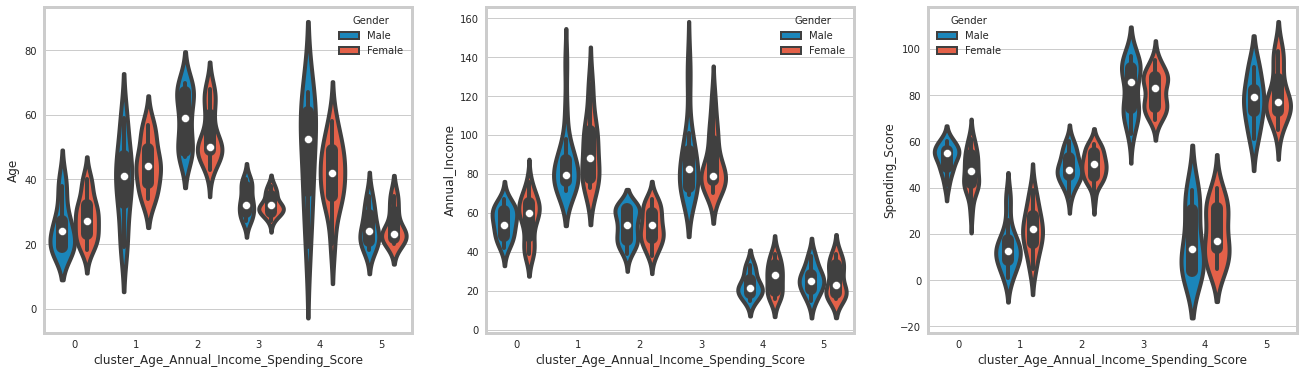

In [238]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.violinplot(y = "Age", x = "cluster_Age_Annual_Income_Spending_Score", hue= "Gender", data = df_X3)

plt.subplot(132)
sns.violinplot(y = "Annual_Income", x = "cluster_Age_Annual_Income_Spending_Score", hue= "Gender", data = df_X3)

plt.subplot(133)
sns.violinplot(y = "Spending_Score", x = "cluster_Age_Annual_Income_Spending_Score", hue= "Gender", data = df_X3)

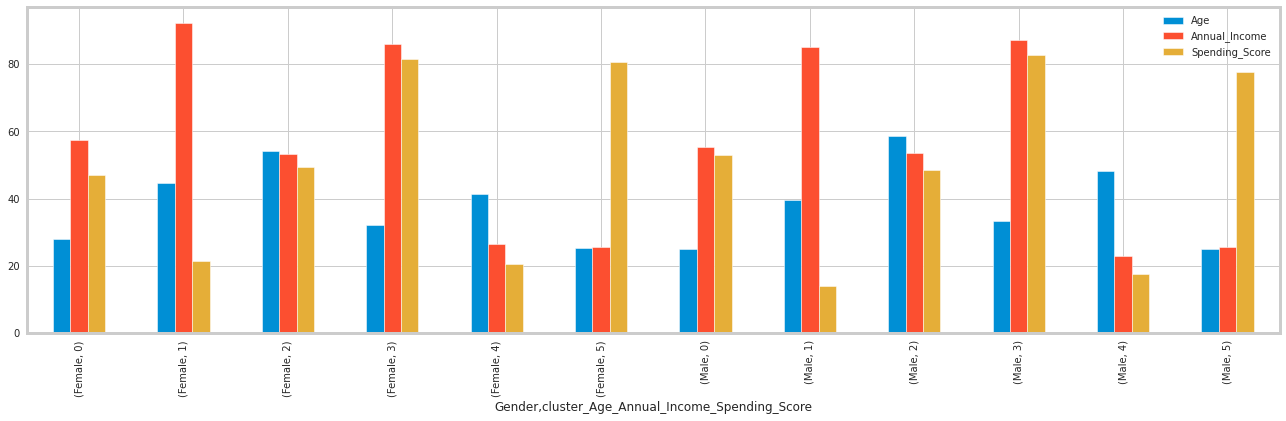

In [239]:
ax = df_X3.groupby(["Gender", "cluster_Age_Annual_Income_Spending_Score"]).mean().plot(kind="bar", figsize=(20,6))


**Female**

cluster 0: The average age is around 25. Their annual_incomes are higher spending scores. This group does a lot of shopping, but they do not bring much profit. some special promotions may help to increase their spending scores.

cluster 1 : The average age is around 45. Low annual_incomes but very high spending scores. This group does a lot of shopping, but they do not bring much profit.

cluster 2: The average age is around 45,  both annual income and spending_scores are on average. It should be researched what can be done to direct more spending.

cluster 3: The average age is around 30, the annual income and the spending_score is very high. This group consists of our loyal customers. Our company derives the main profit from this group. Very special promotions can be made in order not to miss any customer from this group.

cluster 4 :The average age is around 42. Both annual income and spending_scores are low. It can be directed to shopping with gift certificates.

cluster 5 :The average age is around 25. Low annual_incomes but very high spending scores. This group does a lot of shopping, but they do not bring much profit.

**Male**

cluster 0: The average age is around 25. Both annual income and spending_scores are on average. It should be researched what can be done to direct more spending.

cluster 1 :
The average age is around 40, the annual income is very high but the spending_scores is very low. This group is our target audience and special strategies need to be developed for this group.


cluster 2:The average age is around 60. Both annual income and spending_scores are on average. It should be researched what can be done to direct more spending.


cluster 3:The average age is around 30, the annual income and the spending_score is very high. This group consists of our loyal customers. Our company derives the main profit from this group. Very special promotions can be made in order not to miss any customer from this group.

cluster 4 :The average age is around 42. Both annual income and spending_scores are low. It can be directed to shopping with gift certificates.


cluster 5 :The average age is around 25. Low annual_incomes but very high spending scores. This group does a lot of shopping, but they do not bring much profit.

#references

https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html

https://notebook.community/DistrictDataLabs/yellowbrick/examples/clustering_visualizers
https://towardsdatascience.com/clustering-algorithm-for-customer-segmentation-e2d79e28cbc3
https://www.wikipedia.org
